In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## making standrization for the data 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import dendrogram, linkage

pd.options.display.float_format = '{:,.2f}'.format
import re

%matplotlib inline
plt.rcParams['figure.figsize'] = 15, 10

In [2]:
pd.options.display.max_columns =30
pd.set_option('display.max_colwidth', None)

In [3]:
df = pd.read_csv('D:\D\DataAnalysis-Projects\shopee\shopee_sample_data.csv')
df_pop = pd.read_excel('D:\D\DataAnalysis-Projects\shopee\Malaysia Population by States.xlsx',)
df_pop.dropna(axis=0, inplace=True)

In [4]:
df_pop['State[16]'] = df_pop['State[16]'].str.replace("FT",'').str.strip()
df_pop.rename(columns={'State[16]':'State'},inplace=True)

In [5]:

df_pop.to_csv('D:\D\DataAnalysis-Projects\shopee\Malaysia_states_population_cleaned.csv')
df_pop

,State,Population,Area (km2),Pop. density,Urban pop.(%),Bumiputra (%),Chinese (%),Indian (%)
0,Johor,"3,348,283.00","19,210.00",174.00,71.90,58.90,33.60,7.10
1,Kedah,"1,890,098.00","9,500.00",199.00,64.60,77.90,13.60,7.30
2,Kelantan,"1,459,994.00","15,099.00",97.00,42.40,95.70,3.40,0.30
3,Malacca,"788,706.00","1,664.00",470.00,86.50,66.90,26.40,6.20
4,Negeri Sembilan,"997,071.00","6,686.00",150.00,66.50,61.30,23.20,15.20
5,Pahang,"1,443,365.00","36,137.00",40.00,50.50,79.00,16.20,4.40
6,Penang,"1,520,143.00","1,048.00","1,500.00",90.80,43.60,45.60,10.40
7,Perak,"2,258,428.00","21,035.00",110.00,69.70,57.00,30.40,12.20
8,Perlis,"227,025.00",821.00,280.00,51.40,88.40,8.00,1.20
9,Selangor,"5,411,324.00","8,104.00",670.00,91.40,57.10,28.60,13.50


In [6]:
df.head(10)

,price_ori,delivery,item_category_detail,specification,title,w_date,link_ori,item_rating,seller_name,idElastic,price_actual,sitename,idHash,seller_details,location,total_rating,id,pict_link,total_sold,favorite,timestamp,desc
0,29.16,"Shipping Pre-Order (ships in 11 days) Shipping to KL City, Kuala Lumpur shipping fee RM0.63",Shopee | Women's Clothing | Skirts,"Category Shopee Women's Clothing Skirts Brand No Brand Material Linen Stock 333 Ships From Lubok China, 000001 Melaka",Alice's new elegant style ultra-fairy French debut dress retro bubble sleeves show thin waist-length dress. | Shopee Malaysia,"20,201,123.00",https://shopee.com.my/Alice's-new-elegant-style-ultra-fairy-French-debut-dress-retro-bubble-sleeves-show-thin-waist-length-dress.-i.289692914.6445108772,NaN,8ysl9a1301,6e1e3d7b51a4c1099c368114ab91a88a,29.16,shopee,97dcb011fc73ec4b3c31eed989ae0094,8ysl9a1301 Active 3 hours ago chat now view shop Ratings10products996 response rate28% response timewithin hours joined4 months ago follower134,"Lubok China, 000001 Melaka",0,"6,445,108,772.00",https://cf.shopee.com.my/file/63256421fb2286655d880d745ba6eb13,NaN,80,"1,606,064,400,000.00",Promotions: Summer's new elegant style ins super-fairy French debut dress retro bubble sleeves show thin waist dress. - Buy Alice's new elegant style ultra-fairy French debut dress retro bubble sleeves show thin waist-length dress.
1,57.78,"Shipping Free shipping Free shipping for orders over RM500.00 Shipping to KL City, Kuala Lumpur shipping fee RM0.00 - RM10.00",Shopee | Women's Clothing | Dresses | Midi Dresses,"Category Shopee Women's Clothing Dresses Midi Dresses Brand No Brand Material Polyester Sillhouette Slim Colour Yellow Pattern Plain Style A-Line Neckline Square Neck Sleeves Short Sleeve Occasion Casual Stock 392 Ships From KLCC, 50088 Kuala Lumpur",👍👍Korean Vintage Style Square Neck Slim Midi Dresses | Shopee Malaysia,"20,201,123.00",https://shopee.com.my/👍👍Korean-Vintage-Style-Square-Neck-Slim-Midi-Dresses-i.233783911.5445224905,NaN,showcasemywardore,a4248a77a54045ea69f18cb87ada6fb2,57.78,shopee,5b870a335a74b055c9a24083da6e925a,showcasemywardore Active 3 hours ago chat now view shop Ratings773products5k response rate70% response timewithin hours joined9 months ago follower3k,"KLCC, 50088 Kuala Lumpur",1,"5,445,224,905.00",https://cf.shopee.com.my/file/559058f73c771491af9a5b11f5e54c4d,NaN,61,"1,606,064,400,000.00","- Color: Multicolor\n\n- Material: Polyester\n\n- Size (Chinese Size, CM): Picture 9\n\n(Size chart is for reference only, due to manual measurement, the error of 3-5 cm is available, not as a reason for return and refund)\n\n[Purchase Notice]⛔️\n\n1. If you are not sure about the size, please feel free to contact us.\n2. Do not accept urgent orders, send 3-5 days, under normal circumstances, can receive about 12-15 days;\n3. New buttonholes in denim clothing and trousers are not cut;\n4. Due to mobile phone or computer screen lighting, the color of the picture will be different;\n5. If you have problems after picking, there are few deliveries, please feel free to contact us;\n6. Support returns but does not support replacement, must maintain the new situation of the goods within seven days (not used), the buyer needs to be responsible for the freight, plus packaging and complete return.\n\n※If you are satisfied with our products and services, please give us a five-star rating. If you are not satisfied, please feel free to contact us. Thank you very much❤\n\n#womenclothing #girlcloting #dress #partydress #eveningdress #womendress #plussize #koreanstyle #longdress #mididress #maxidress - Buy 👍👍Korean Vintage Style Square Neck Slim Midi Dresses"
2,82.00,"Shipping Free shipping Shipping from overseas to KL City, Kuala Lumpur shipping fee RM0.00",Shopee | Women's Clothing | Dresses | Maxi Dresses,Category Shopee Women's Clothing Dresses Maxi Dresses Brand Zanzea Material Cotton Sillhouette Loose Colour Green Pattern Plain Style A-Line Neckline Round Neck Sleeves Straples

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42425 entries, 0 to 42424
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price_ori             42267 non-null  float64
 1   delivery              42363 non-null  object 
 2   item_category_detail  42363 non-null  object 
 3   specification         42363 non-null  object 
 4   title                 42363 non-null  object 
 5   w_date                42363 non-null  float64
 6   link_ori              42363 non-null  object 
 7   item_rating           38623 non-null  float64
 8   seller_name           42363 non-null  object 
 9   idElastic             42363 non-null  object 
 10  price_actual          42335 non-null  float64
 11  sitename              42363 non-null  object 
 12  idHash                42363 non-null  object 
 13  seller_details        41671 non-null  object 
 14  location              33756 non-null  object 
 15  total_rating       

### initial insights and questions

- some data types need to be changed
- data nulls are not many, except for location (not too many)
- w_date ->> crawling date



### Questions 
- What is the distribution of sales or revenue across different product categories?
- What are the top-selling products?
- What is the average price of products sold on the platform?
- Are there any seasonal trends in sales or revenue?
- How does the number of reviews or ratings for a product relate to its sales?
- Are there any outliers in the data, such as particularly high or low values?
- What is the customer demographics that mostly purchase from the shop?
- What is the relationship between product price, sold quantity and rating?

### Data Cleansing 
- change data types of some columns
- handle nulls/outliers if exist
- extract categories
- drop unnecessary columns
- drop duplicates if exist 
- and anything may be found during EDA

In [8]:
df['item_category_detail'].str.split('|',expand=True)

,0,1,2,3
0,Shopee,Women's Clothing,Skirts,None
1,Shopee,Women's Clothing,Dresses,Midi Dresses
2,Shopee,Women's Clothing,Dresses,Maxi Dresses
3,Shopee,Women's Clothing,Dresses,Maxi Dresses
4,Shopee,Women's Clothing,Dresses,Maxi Dresses
...,...,...,...,...
42420,Shopee,Women's Clothing,Traditional Wear,Saree & Anarkali
42421,Shopee,Women's Clothing,Traditional Wear,None
42422,Shopee,Mobile & Gadgets,Cases & Covers,iPhone Hard Cover
42423,Shopee,Mobile & Gadgets,Cases & Covers,iPhone Soft Cover


In [9]:
#extracting 3 columns from the 'item_category_details' 
main_category = df['item_category_detail'].str.split('|',expand=True)[1]
product_type = df['item_category_detail'].str.split('|',expand=True)[2]
sold_item = df['item_category_detail'].str.split('|',expand=True)[3]

df['main_ctegory'] = main_category
df['product_type'] = product_type
df['sold_item'] = sold_item

df.drop(columns='item_category_detail',inplace=True)

In [10]:
#top 10 product types sold
df['product_type'].value_counts()[0:10]


 Snacks                    2266
 Books                     1919
 Men's Watches             1864
 Plus Size                 1669
 Cooking Ingredients       1367
 Car Replacement Parts     1363
 Watch Accessories         1316
 Women's Watches           1296
 Pet Supplies              1148
 Hobby Toys                 901
Name: product_type, dtype: int64

In [11]:
#top 10 of 'main category' of items sold
df['main_ctegory'].value_counts()[0:10]

 Groceries & Pets           9728
 Watches                    4916
 Games, Books & Hobbies     3814
 Baby & Toys                3642
 Women's Clothing           3357
 Automotive                 3312
 Home & Living              2865
 Men's Clothing             2388
 Muslim Fashion             2184
 Fashion Accessories        1308
Name: main_ctegory, dtype: int64

In [12]:
#check nulls in the item 
df['sold_item'].isnull().value_counts()

False    38835
True      3590
Name: sold_item, dtype: int64

In [13]:
#top 15 of items sold 
df['sold_item'].value_counts()[0:15]

 Straps & Clasps           1086
 Women's Casual            1070
 Local Books                985
 Car Lights                 959
 Action Figures             737
 Men's Digital              716
 Motor Spare Parts          570
 Herbs & Spices             565
 Men's Analogue             544
 Pet Grooming & Hygiene     475
 Chocolate                  471
 Biscuits & Cookies         460
 Sauces & Dressings         447
 Large Size T-shirts        443
 Large Size Pants           442
Name: sold_item, dtype: int64

In [14]:
df['sold_item'].unique()

array([None, ' Midi Dresses', ' Maxi Dresses', ' Mini Dresses',
       ' Boxers & Trunks', ' Crop Tops', ' T-Shirts', ' Blouse',
       ' Shirts', ' Tunics', ' Muslimah Skirts', ' Off Shoulder Tops',
       ' Tanks & Camisoles', ' Samsung', ' Long Pants',
       ' Shorts & Skorts', ' Jeans', ' Coats & Jackets', ' Bottoms',
       ' Sweaters', ' Casual Set', ' Cardigans', ' Baby One Piece',
       ' Baby Walkers', ' Teethers & Pacifiers', ' Vivo',
       ' Bathing Accessories', ' Puree', ' Car Seats', ' Speakers',
       ' Portable Speakers', ' Statement Tees', ' Graphic Tees',
       ' Solid Tees', ' Printed Shirts', ' Realme',
       ' Plain Casual Shirts', ' Patterned Polos', ' Business Shirts',
       ' Shorts', ' Checkered Shirts', ' Jerseys', ' Long Sleeve Tees',
       ' Suits', ' Cargo Pant', ' Huawei', ' Joggers & Sweatpants',
       ' Wireless Earbuds', ' Formal Pant', ' OPPO', ' Large Size Shirts',
       ' Hoodies', ' Earbuds', ' Microphones', ' Jackets',
       ' On-Ear Hea

In [15]:
df[['sold_item','specification','title']][df['sold_item'].isna()==True]

,sold_item,specification,title
0,None,"Category Shopee Women's Clothing Skirts Brand No Brand Material Linen Stock 333 Ships From Lubok China, 000001 Melaka",Alice's new elegant style ultra-fairy French debut dress retro bubble sleeves show thin waist-length dress. | Shopee Malaysia
13,None,"Category Shopee Women's Clothing Dresses Brand No Brand Stock 144 Ships From KOTA BANDUNG - CICENDO, JAWA BARAT, ID",D-0154 Korean Bodycon Hand Chiffon Dress | Shopee Malaysia
36,None,"Category Shopee Women's Clothing Tops Brand No Brand Stock 987 Ships From Lubok China, 000001 Melaka",ALICE2020 new temperament waist waist was thin sweet small shirt short French retro puff sleeve top female fashion | Shopee Malaysia
64,None,"Category Shopee Women's Clothing Pants & Shorts Material Polyester Stock 4 Ships From Ipoh, 31650 Perak",FAITH FRONT AND BLACK SLITS STRIPE CULOTTES | Shopee Malaysia
145,None,"Category Shopee Mobile & Gadgets Mobile Phones Brand Vivo Model Vivo models Internal Storage 16GB Warranty Period 1 Month Warranty Warranty Type Supplier Warranty Item Condition Used Stock 1288 Ships From City Centre, 55100 Kuala Lumpur","Vivo Y53 , Y55 , Y66 , Y67 , Y71 & Y81 (original secondhand)original lcd original body original parts | Shopee Malaysia"
...,...,...,...
42407,None,Category Shopee Women's Clothing Brand No Brand Stock 830,无需手续费 专业代购 代付代运天猫tmall淘宝Taobao女装 拼多多Pinduoduo 阿里巴巴1688 京东JingDong jd 得物 毒du 闲鱼xianyu【CHINESE/ENGLISH】唯品会等等平台 | Shopee Malaysia
42408,None,"Category Shopee Women's Clothing Tops Brand No Brand Stock 3014 Ships From Mentakab, 28400 Pahang",PREMIUM LIVE LOCK ONLY ‼️‼️ ‼️ | Shopee Malaysia
42413,None,"Category Shopee Women's Clothing Traditional Wear Brand No Brand Stock 9 Ships From Johor Bahru, 81200 Johor",ELEGANT SILK SAREE C-SKY GREEN COLOUR ...... | Shopee Malaysia
42417,None,"Category Shopee Women's Clothing Tops Brand No Brand Pattern Plain Colour Multi Colour Style A-Line Stock 3000 Ships From Shah Alam, 40200 Selangor",[Live Only] KNIT BY MEMZ | Shopee Malaysia


In [16]:
# to extract any sold_item from the 'specification' we will get it using pattern from the sold item values
items = list(df['sold_item'].unique())
items_patt = '|'.join(map(str,items))

#thes items below would be labeling as 'missed' if we forot to extract it from the 'specification' column
missed_items = df['specification'][df['sold_item'].isna()== True].apply(lambda x:'missed' 
                        if x==None or x=='nan'
                        else ( str(re.search(items_patt,str(x) ) ).split("match='")[1].replace("'>",'').strip() ) 
                        if re.search(items_patt,str(x)) else "missed")
missed_items.unique()

array(['missed', 'Dresses', 'Tops', 'Pants & Shorts', 'Vivo', 'Shirts',
       'Singlets', 'OPPO', 'Watches', 'Bags', 'nan', 'Accessories', 'DIY',
       'Jubah', 'Beauty Supplement', 'Motorcycles', 'Engine Oil',
       'Leather', 'Canvas', 'Sandals', 'Puree', 'Fabric & Materials',
       'Bedding', 'Blouse', 'Bottoms', 'Tea', 'Chocolate',
       'Training Equipment', 'DVDs', 'Backpack', 'Tablet', 'Innerwear',
       'Heels', 'Set Wear', 'Boots', 'Sim Cards', 'Drones',
       'Automotive Merchandise', 'Denim', 'Jeans', 'Beachwear',
       'Traditional Wear', 'Lingerie', 'Outerwear', 'Playsuits', 'Water'],
      dtype=object)

In [17]:
#assign the 'missed_items' to the 'sold_item' column
df.loc[df['sold_item'].isna()== True, 'sold_item']= missed_items

#using strip function to remove all spaces
df['sold_item'] = df['sold_item'].apply(lambda x: x.lstrip())

#looking at top 15 of items sold and compare it with the previous list
df['sold_item'].value_counts()[0:15]

missed                    2046
Straps & Clasps           1086
Women's Casual            1070
Local Books                985
Car Lights                 959
Action Figures             737
Men's Digital              716
Motor Spare Parts          570
Herbs & Spices             565
Men's Analogue             544
Chocolate                  486
Watches                    483
Pet Grooming & Hygiene     475
Biscuits & Cookies         460
Sauces & Dressings         447
Name: sold_item, dtype: int64

### - when you compare this list with the previous one, you will find that the ranking of items start to differ from the 10th item 

In [18]:
# making the same process but this time with 'title' column
df[['sold_item','title']][df['sold_item']=='missed']

,sold_item,title
0,missed,Alice's new elegant style ultra-fairy French debut dress retro bubble sleeves show thin waist-length dress. | Shopee Malaysia
240,missed,【網紅熱賣】{S-5XL} Summer Couple Striped Short-sleeved T-shirt Students Fashion Casual Loose Five-point Sleeves | Shopee Malaysia
837,missed,[Little B House] Auto Play Zikir & Al-Quran/Ruqyah Plug 24hours Non Stop -ZikirPlug | Shopee Malaysia
843,missed,86/168/208pcs Kids Painting Pen Colour Crayon Marker Pencil Drawing Art Set 208 pcs color | Shopee Malaysia
976,missed,AVOSKY Baby Kid Playpen Fence Foldable Tent House Play Yard Guard Rail Hexagon Toys Toy House Play Outdoor Indoor | Shopee Malaysia
...,...,...
42401,missed,LIVE ITEM CAMPUR2(MIX) | Shopee Malaysia
42402,missed,Payment Link (Shopee Live)❗ | Shopee Malaysia
42403,missed,💥HOT SALE💥[LIVE ONLY] KNITWEAR PREMIUM & BRANDED | Shopee Malaysia
42405,missed,🔥HOT ITEM!!!🔥 Baju T-Shirt Lengan Panjang Dewasa | Shopee Malaysia


In [19]:
df.loc[df['sold_item']== 'missed', 'sold_item']= df['title'][df['sold_item']== 'missed'].apply(lambda x:'missed' 
                        if x==None or x=='nan'
                        else ( str(re.search(items_patt,str(x) )).split("match='")[1].replace("'>",'').strip() )  
                        if re.search(items_patt,str(x)) else "missed")

In [20]:
#this made a slight different than the previous extraction process
df['sold_item'].value_counts()[0:15]

missed                    1862
Straps & Clasps           1086
Women's Casual            1070
Local Books                985
Car Lights                 959
Action Figures             737
Men's Digital              716
Motor Spare Parts          570
Herbs & Spices             565
Men's Analogue             544
Chocolate                  502
Watches                    483
Pet Grooming & Hygiene     475
Biscuits & Cookies         460
Sauces & Dressings         447
Name: sold_item, dtype: int64

### extracting shipping fee from delivery column 

In [21]:
shipping_fee_primary = df['delivery'].str.split(",", expand=True)[1]
df['shipping_fee'] = shipping_fee_primary.str.split("fee",expand=True)[1]


In [22]:
df['shipping_fee']

0                   RM0.63
1         RM0.00 - RM10.00
2                   RM0.00
3                   RM0.00
4                   RM0.00
               ...        
42420               RM0.63
42421               RM0.63
42422      RM0.63 - RM1.01
42423               RM0.00
42424               RM0.00
Name: shipping_fee, Length: 42425, dtype: object

In [23]:
# remove 'rm' from shiping fees and fill null values with 0
f_fee_range = df['shipping_fee'].str.replace('RM',"").str.split("-",expand=True)[0].fillna(0)
s_fee_range = df['shipping_fee'].str.replace('RM',"").str.split("-",expand=True)[1].fillna(0)

# change the 2 series of fess into float  
f_fee_range = pd.to_numeric(f_fee_range, errors='coerce', downcast="float")
s_fee_range = s_fee_range.astype(float)

# change shipping fees ranges to be the mean
mean_shipping_fee = (f_fee_range + s_fee_range) / 2
df['mean_shipping_fee'] = mean_shipping_fee

#dropping the 'shipping_fee' column
df.drop(columns='shipping_fee', inplace=True)

In [24]:
df

,price_ori,delivery,specification,title,w_date,link_ori,item_rating,seller_name,idElastic,price_actual,sitename,idHash,seller_details,location,total_rating,id,pict_link,total_sold,favorite,timestamp,desc,main_ctegory,product_type,sold_item,mean_shipping_fee
0,29.16,"Shipping Pre-Order (ships in 11 days) Shipping to KL City, Kuala Lumpur shipping fee RM0.63","Category Shopee Women's Clothing Skirts Brand No Brand Material Linen Stock 333 Ships From Lubok China, 000001 Melaka",Alice's new elegant style ultra-fairy French debut dress retro bubble sleeves show thin waist-length dress. | Shopee Malaysia,"20,201,123.00",https://shopee.com.my/Alice's-new-elegant-style-ultra-fairy-French-debut-dress-retro-bubble-sleeves-show-thin-waist-length-dress.-i.289692914.6445108772,NaN,8ysl9a1301,6e1e3d7b51a4c1099c368114ab91a88a,29.16,shopee,97dcb011fc73ec4b3c31eed989ae0094,8ysl9a1301 Active 3 hours ago chat now view shop Ratings10products996 response rate28% response timewithin hours joined4 months ago follower134,"Lubok China, 000001 Melaka",0,"6,445,108,772.00",https://cf.shopee.com.my/file/63256421fb2286655d880d745ba6eb13,NaN,80,"1,606,064,400,000.00",Promotions: Summer's new elegant style ins super-fairy French debut dress retro bubble sleeves show thin waist dress. - Buy Alice's new elegant style ultra-fairy French debut dress retro bubble sleeves show thin waist-length dress.,Women's Clothing,Skirts,missed,0.31
1,57.78,"Shipping Free shipping Free shipping for orders over RM500.00 Shipping to KL City, Kuala Lumpur shipping fee RM0.00 - RM10.00","Category Shopee Women's Clothing Dresses Midi Dresses Brand No Brand Material Polyester Sillhouette Slim Colour Yellow Pattern Plain Style A-Line Neckline Square Neck Sleeves Short Sleeve Occasion Casual Stock 392 Ships From KLCC, 50088 Kuala Lumpur",👍👍Korean Vintage Style Square Neck Slim Midi Dresses | Shopee Malaysia,"20,201,123.00",https://shopee.com.my/👍👍Korean-Vintage-Style-Square-Neck-Slim-Midi-Dresses-i.233783911.5445224905,NaN,showcasemywardore,a4248a77a54045ea69f18cb87ada6fb2,57.78,shopee,5b870a335a74b055c9a24083da6e925a,showcasemywardore Active 3 hours ago chat now view shop Ratings773products5k response rate70% response timewithin hours joined9 months ago follower3k,"KLCC, 50088 Kuala Lumpur",1,"5,445,224,905.00",https://cf.shopee.com.my/file/559058f73c771491af9a5b11f5e54c4d,NaN,61,"1,606,064,400,000.00","- Color: Multicolor\n\n- Material: Polyester\n\n- Size (Chinese Size, CM): Picture 9\n\n(Size chart is for reference only, due to manual measurement, the error of 3-5 cm is available, not as a reason for return and refund)\n\n[Purchase Notice]⛔️\n\n1. If you are not sure about the size, please feel free to contact us.\n2. Do not accept urgent orders, send 3-5 days, under normal circumstances, can receive about 12-15 days;\n3. New buttonholes in denim clothing and trousers are not cut;\n4. Due to mobile phone or computer screen lighting, the color of the picture will be different;\n5. If you have problems after picking, there are few deliveries, please feel free to contact us;\n6. Support returns but does not support replacement, must maintain the new situation of the goods within seven days (not used), the buyer needs to be responsible for the freight, plus packaging and complete return.\n\n※If you are satisfied with our products and services, please give us a five-star rating. If you are not satisfied, please feel free to contact us. Thank you very much❤\n\n#womenclothing #girlcloting #dress #partydress #eveningdress #womendress #plussize #koreanstyle #longdress #mididress #maxidress - Buy 👍👍Korean Vintage Style Square Neck Slim Midi Dresses",Women's Clothing,Dresses,Midi Dresses,5.00
2,82.00,"Shipping Free shipping Shipping from overseas to KL City, Kuala Lumpur shipping fee RM0.00",Category Shopee Women's Clothing Dresses Maxi Dresses Brand Zanzea Material Cotton Sillhouette Loose Colour Green Pattern Plain Style A-Line Neckline Round Neck Sleeves Strapless Occasion Casual Stock 1

In [25]:
### SOME QUICK CLEANING ###

# columns will not be used [title,link_ori,idElastic, sitename, idHash, pict_link] 
# and 'timestamp' becaus it refers only to the time of extracting these data
df.drop(columns=['title','link_ori','idElastic','sitename','idHash','pict_link','timestamp'], inplace=True)

# columns that need to convert their data types ['w_date','timestamp']
df['w_date']= pd.to_datetime(df['w_date'], format='%Y%m%d')



In [26]:
#quick look at the top number of cities in location 
print(df.location.value_counts()[:10])
print("\n*************************************\n")
print(df.location.value_counts().tail(10))

Mainland China                    1876
Puchong, 47100 Selangor            856
Kajang, 43000 Selangor             822
Johor Bahru, 81100 Johor           775
Selangor                           740
Cheras, 56100 Kuala Lumpur         666
Seri Kembangan, 43300 Selangor     598
Bukit Mertajam, 14000 Penang       580
Cheras, 56000 Kuala Lumpur         417
Kelana Jaya, 47301 Selangor        416
Name: location, dtype: int64

*************************************

Jerantut, 27030 Pahang                         1
Seri Kembangan, 47120 Selangor                 1
KAB. TASIKMALAYA - SUKARAME, JAWA BARAT, ID    1
Others, 51000 Kuala Lumpur                     1
Cameron Highlands, 39000 Pahang                1
Temangan, 18500 Kelantan                       1
Sarikei, 96100 Sarawak                         1
Others, 84000 Johor                            1
Others, 16800 Kelantan                         1
Karangan, 09700 Kedah                          1
Name: location, dtype: int64


In [27]:
# make a llist from the states of malaysia then use join to make pattern for regex
local_states = list(df_pop['State'].values)
local_states = local_states+['Kuala Lumpur','Labuan','Putrajaya','Melaka']
pattern = '|'.join(local_states)

## every nan location refering to overseas 
df['location'].fillna('oversea',inplace=True)

#create a new column for location
df['seller_location'] = df['location'].apply(lambda x:str(re.findall(pattern,x)[0]) if re.search(pattern,x,) else(x if x=='oversea' else 'unknown'))
#change melaka to 'Malacca' because it's the malaysian name
df.loc[df['seller_location']=='Melaka', 'seller_location']= 'Malacca'

#drop the old column of 'location'
df.drop(columns='location',inplace=True)

In [28]:
df['seller_location'].value_counts()

Selangor           12781
oversea             8669
Kuala Lumpur        4493
unknown             3125
Johor               2926
Penang              2648
Perak               2135
Kedah               1278
Kelantan            1073
Negeri Sembilan      779
Terengganu           725
Malacca              666
Pahang               546
Perlis               218
Sarawak              147
Sabah                143
Putrajaya             63
Labuan                10
Name: seller_location, dtype: int64

In [29]:
#filling the null values in 'item_rating', 'total_sold' and 'total_rating'
df.fillna({'item_rating':0, 'total_sold':0, 'total_rating':0, 'price_ori':0},inplace=True)

# 'total_rating' and 'total_sold' are objects because of 'K' strings
df['total_rating'] = df['total_rating'].apply(lambda x: int(round(float(str(x).replace('k','')) *1000,1)) if str(x).find('k') !=-1 else x).astype(float)
df['total_sold'] = df['total_sold'].apply(lambda x: round(float(str(x).replace('k','')) *1000,1) if str(x).find('k') !=-1 else x).astype(float)

#change total rating to int after removing 'K'
df['total_rating'] = df['total_rating'].astype(int)

#check the duplicated (54 rows)
df.drop_duplicates(keep='first',inplace=True)
df.duplicated().value_counts()

False    42371
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42371 entries, 0 to 42424
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   price_ori          42371 non-null  float64       
 1   delivery           42363 non-null  object        
 2   specification      42363 non-null  object        
 3   w_date             42363 non-null  datetime64[ns]
 4   item_rating        42371 non-null  float64       
 5   seller_name        42363 non-null  object        
 6   price_actual       42335 non-null  float64       
 7   seller_details     41671 non-null  object        
 8   total_rating       42371 non-null  int32         
 9   id                 42363 non-null  float64       
 10  total_sold         42371 non-null  float64       
 11  favorite           39708 non-null  object        
 12  desc               42363 non-null  object        
 13  main_ctegory       42363 non-null  object        
 14  produc

In [31]:
## VALIDATING
#check 'nan' in seller name and compare it with ['desc','delivery','specification' , 'seller_details'] 
# trying to extract the seller name from them
df[df['seller_name'].isna()]

#drop these rows
df.dropna(subset='seller_name', inplace=True)

### - Insight: some of 'unknown' locations are mentioned as 'overseas or china' in the 'delivery' column

In [32]:
## VALIDATING
#check the seller location where equal to 'unknown' with 'deleviry' to get the location
df[['seller_location','seller_name','delivery']][df['seller_location'] == 'unknown']



,seller_location,seller_name,delivery
2,unknown,zanzea.os,"Shipping Free shipping Shipping from overseas to KL City, Kuala Lumpur shipping fee RM0.00"
4,unknown,zanzea.os,"Shipping Free shipping Shipping from overseas to KL City, Kuala Lumpur shipping fee RM0.00"
11,unknown,zanzea.os,"Shipping Free shipping Shipping from overseas to KL City, Kuala Lumpur shipping fee RM0.00"
12,unknown,zanzea.os,"Shipping Free shipping Shipping from overseas to KL City, Kuala Lumpur shipping fee RM0.00"
13,unknown,kadakaofficial.my,"Shipping Free shipping Shipping from overseas to KL City, Kuala Lumpur shipping fee RM0.00"
...,...,...,...
42390,unknown,nana881027.my,"Shipping Free shipping Shipping from Mainland China to KL City, Kuala Lumpur shipping fee RM0.00"
42391,unknown,itissunnys.my,"Shipping Pre-Order (ships in 7 days) Free shipping Shipping from Mainland China to KL City, Kuala Lumpur shipping fee RM0.00"
42411,unknown,zanzea.os,"Shipping Free shipping Shipping from Mainland China to KL City, Kuala Lumpur shipping fee RM0.00"
42416,unknown,360shop01.my,"Shipping Free shipping Shipping from Mainland China to KL City, Kuala Lumpur shipping fee RM0.00"


In [33]:
#before cleaning  and it shows that all 'unknown' values referring to 'oversea'
df['delivery'][df['seller_location'] == 'unknown'].value_counts()

Shipping Free shipping Shipping from overseas to KL City, Kuala Lumpur shipping fee RM0.00                                                                                2301
Shipping Free shipping Shipping from Mainland China to KL City, Kuala Lumpur shipping fee RM0.00                                                                           547
Shipping Free shipping Shipping from Indonesia to KL City, Kuala Lumpur shipping fee RM0.00                                                                                 43
Shipping Pre-Order (ships in 10 days) Free shipping Shipping from overseas to KL City, Kuala Lumpur shipping fee RM0.00                                                     41
Shipping Pre-Order (ships in 7 days) Free shipping Shipping from overseas to KL City, Kuala Lumpur shipping fee RM0.00                                                      30
Shipping Shipping from overseas to KL City, Kuala Lumpur shipping fee RM2.20                                                 

In [34]:
#create a pattern for china and overseas
patt = 'overseas|china|China|HongKong|Hong Kong|hongkong|Korea|Taiwan|Indonesia'

#create copied delivery column to prevent changing in the main column
df['del_cp'] = df['delivery'][df['seller_location'] == 'unknown'].apply(lambda x:'oversea' if re.search(patt,x) else x )

#assign 'overseas' to 'seller_location'
df.loc[df['del_cp'] == 'oversea', 'seller_location'] = 'oversea'

df.drop(columns='del_cp',inplace=True)

In [35]:
#checking the delivery column after cleaning ("no overses or china")
df[['delivery','seller_location']][df['seller_location'] == 'unknown']

,delivery,seller_location
10964,Shipping Loading...,unknown
17347,Shipping Loading...,unknown
17969,Shipping Loading...,unknown
41629,Shipping Loading...,unknown


In [36]:
#removind 'delivery' column after extracting all important information from it
df.drop(columns=['delivery','specification'],inplace=True)

In [37]:
## extracting 'seller_duration' from specificaation column
df['seller_duration'] = df['seller_details'].str.split('joined',expand=True)[1].str.split('ago',expand=True)[0]

#checking the null values 
print(df['seller_duration'].isna().value_counts())

df['seller_duration'].fillna('missed',inplace=True)



False    34995
True      7368
Name: seller_duration, dtype: int64


### the following commant to check if there are more details about joining date can be extracting from the 'seller_details'
- it returns empty series ->> which means there is noy any other details refering to the joining data for the seller

In [38]:
df['seller_details'][df['seller_duration'].isna()].apply(lambda x: 'here' if str(re.search('joined|Joined|ago',x)) else x)

Series([], Name: seller_details, dtype: object)

In [39]:
df.drop(columns=['seller_details','desc','id','favorite'],inplace=True)

In [40]:
#change seller duration to categories [<1 year, 1-3 years, 3-5 years, > 5 years]
df['seller_duration']

0        4 months 
1        9 months 
2         3 years 
3        4 months 
4         3 years 
           ...    
42420     4 years 
42421    2 months 
42422     5 years 
42423    8 months 
42424       missed
Name: seller_duration, Length: 42363, dtype: object

In [41]:
df['seller_duration']=df['seller_duration'].apply(lambda x: round(float(x.replace('months',''))/12,2) if re.search('months',x)
                             else ( round(float(x.replace('days',''))/12,2) if re.search('days',x) 
                                   else ( int(x.replace('years','')) if re.search('years',x) else x)  )
     ) 

In [42]:
df['seller_duration']

0          0.33
1          0.75
2             3
3          0.33
4             3
          ...  
42420         4
42421      0.17
42422         5
42423      0.67
42424    missed
Name: seller_duration, Length: 42363, dtype: object

In [43]:
df['seller_duration'] = df['seller_duration'].apply(lambda x: 'missed' if x== 'missed' or x == 'label_productshop_'
                            else( '< 1 year' if float(x) < 1
                            else( '1 - 3 years'   if float(x) >=1 and float(x) <3 
                            else ( '3 - 5 years' if float(x) >=3 and float(x)<5 
                            else ( '> 5 years' if float(x)>=5 else x ) ) ) ) )

In [44]:
df['seller_duration'].unique()

array(['< 1 year', '3 - 5 years', '1 - 3 years', 'missed', '> 5 years'],
      dtype=object)

In [45]:
df.groupby('seller_duration').size().reset_index(name='freqss')

,seller_duration,freqss
0,1 - 3 years,16676
1,3 - 5 years,11817
2,< 1 year,4142
3,> 5 years,2357
4,missed,7371


In [46]:
df

,price_ori,w_date,item_rating,seller_name,price_actual,total_rating,total_sold,main_ctegory,product_type,sold_item,mean_shipping_fee,seller_location,seller_duration
0,29.16,2020-11-23,0.00,8ysl9a1301,29.16,0,0.00,Women's Clothing,Skirts,missed,0.31,Malacca,< 1 year
1,57.78,2020-11-23,0.00,showcasemywardore,57.78,1,0.00,Women's Clothing,Dresses,Midi Dresses,5.00,Kuala Lumpur,< 1 year
2,82.00,2020-11-23,5.00,zanzea.os,39.36,3,3.00,Women's Clothing,Dresses,Maxi Dresses,0.00,oversea,3 - 5 years
3,115.00,2020-11-23,0.00,airspacemy.os,115.00,0,0.00,Women's Clothing,Dresses,Maxi Dresses,0.00,Selangor,< 1 year
4,40.90,2020-11-23,4.80,zanzea.os,40.90,123,242.00,Women's Clothing,Dresses,Maxi Dresses,0.00,oversea,3 - 5 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42420,105.00,2020-12-02,0.00,padmavathi,105.00,2,0.00,Women's Clothing,Traditional Wear,Saree & Anarkali,0.31,Johor,3 - 5 years
42421,80.00,2020-12-02,5.00,msalimjb,80.00,1,1.00,Women's Clothing,Traditional Wear,Traditional Wear,0.31,Johor,< 1 year
42422,20.70,2020-12-02,4.80,phandes,20.70,1000,"1,600.00",Mobile & Gadgets,Cases & Covers,iPhone Hard Cover,0.82,Kuala Lumpur,> 5 years
42423,30.00,2020-12-02,5.00,housewifepartner.my,30.00,410,774.00,Mobile & Gadgets,Cases & Covers,iPhone Soft Cover,0.00,oversea,< 1 year


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42363 entries, 0 to 42424
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   price_ori          42363 non-null  float64       
 1   w_date             42363 non-null  datetime64[ns]
 2   item_rating        42363 non-null  float64       
 3   seller_name        42363 non-null  object        
 4   price_actual       42328 non-null  float64       
 5   total_rating       42363 non-null  int32         
 6   total_sold         42363 non-null  float64       
 7   main_ctegory       42363 non-null  object        
 8   product_type       41648 non-null  object        
 9   sold_item          42363 non-null  object        
 10  mean_shipping_fee  42340 non-null  float64       
 11  seller_location    42363 non-null  object        
 12  seller_duration    42363 non-null  object        
dtypes: datetime64[ns](1), float64(5), int32(1), object(6)
memory 

In [48]:
#change 'w_date' to 'crawling_date' to be more meaningful  and 'price_ori' to 'orignal_price'
df.rename(columns={'w_date': 'crawling_date', 'price_ori': 'original_price','main_ctegory':'main_category'}, inplace=True)


### Validation

In [49]:
##check duplicated value again
print(df.duplicated().value_counts())

df.drop_duplicates(keep='first',inplace=True)
print('############################')
print(df.duplicated().value_counts())

False    41870
True       493
dtype: int64
############################
False    41870
dtype: int64


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41870 entries, 0 to 42424
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   original_price     41870 non-null  float64       
 1   crawling_date      41870 non-null  datetime64[ns]
 2   item_rating        41870 non-null  float64       
 3   seller_name        41870 non-null  object        
 4   price_actual       41835 non-null  float64       
 5   total_rating       41870 non-null  int32         
 6   total_sold         41870 non-null  float64       
 7   main_category      41870 non-null  object        
 8   product_type       41166 non-null  object        
 9   sold_item          41870 non-null  object        
 10  mean_shipping_fee  41847 non-null  float64       
 11  seller_location    41870 non-null  object        
 12  seller_duration    41870 non-null  object        
dtypes: datetime64[ns](1), float64(5), int32(1), object(6)
memory 

In [51]:
df[df['price_actual'].isna()][['seller_name','sold_item']]

,seller_name,sold_item
635,fernleaf.os,Toddler Milk (1-3 years)
739,momohouse.os,Swaddle
868,momohouse.os,Kids Puzzles
988,momohouse.os,Storage & Dispensers
1204,plasticmaster,Living Room Furniture
1295,wenego,Casual Handbags
1532,laymasia,Chain Bags
2111,slera.sejati,Chocolate
2154,fatinnabilahnadzri,Jam & Spreads
5829,xesshoes,Rounded-Flats


In [52]:
#create a list of values for seller name and items
ss = df[['seller_name','sold_item']][df['price_actual'].isna()].values

for x,y in ss:
    #get the price_actual for the same seller with same sold item
    mean = df['price_actual'][(df['seller_name']==x) & (df['sold_item']==y)].mean()
    
    #change the value of 'orginal_price' then ' price_actual'
    df.loc[(df['sold_item']==y) &
           (df['seller_name']==x)& 
           (df['price_actual'].isna()),'original_price'] = mean 
    df.loc[(df['sold_item']==y) & 
           (df['seller_name']==x)& 
           (df['price_actual'].isna()),'price_actual'] = mean

In [53]:
df[df['price_actual'].isna()][['seller_name','sold_item']]

,seller_name,sold_item
635,fernleaf.os,Toddler Milk (1-3 years)
1204,plasticmaster,Living Room Furniture
2154,fatinnabilahnadzri,Jam & Spreads
7097,bintangcekal,Swimming
14426,nanxingxie88,Shades & Awnings
14589,herman.my,Mirrors & Wall Art
14728,powerbankstation,Clothes Organization
15206,dazzlermax,Bedroom Furniture
15891,mfdesign,Bedroom Furniture
16022,mfdesign,Bedroom Furniture


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41870 entries, 0 to 42424
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   original_price     41857 non-null  float64       
 1   crawling_date      41870 non-null  datetime64[ns]
 2   item_rating        41870 non-null  float64       
 3   seller_name        41870 non-null  object        
 4   price_actual       41857 non-null  float64       
 5   total_rating       41870 non-null  int32         
 6   total_sold         41870 non-null  float64       
 7   main_category      41870 non-null  object        
 8   product_type       41166 non-null  object        
 9   sold_item          41870 non-null  object        
 10  mean_shipping_fee  41847 non-null  float64       
 11  seller_location    41870 non-null  object        
 12  seller_duration    41870 non-null  object        
dtypes: datetime64[ns](1), float64(5), int32(1), object(6)
memory 

In [55]:
#fillin nulls 
df.loc[df['sold_item']=='nan', 'sold_item'] = 'missed'
df.fillna({'price_actual':0,'product_type':'missed','mean_shipping_fee':0},inplace=True)

In [56]:
df

,original_price,crawling_date,item_rating,seller_name,price_actual,total_rating,total_sold,main_category,product_type,sold_item,mean_shipping_fee,seller_location,seller_duration
0,29.16,2020-11-23,0.00,8ysl9a1301,29.16,0,0.00,Women's Clothing,Skirts,missed,0.31,Malacca,< 1 year
1,57.78,2020-11-23,0.00,showcasemywardore,57.78,1,0.00,Women's Clothing,Dresses,Midi Dresses,5.00,Kuala Lumpur,< 1 year
2,82.00,2020-11-23,5.00,zanzea.os,39.36,3,3.00,Women's Clothing,Dresses,Maxi Dresses,0.00,oversea,3 - 5 years
3,115.00,2020-11-23,0.00,airspacemy.os,115.00,0,0.00,Women's Clothing,Dresses,Maxi Dresses,0.00,Selangor,< 1 year
4,40.90,2020-11-23,4.80,zanzea.os,40.90,123,242.00,Women's Clothing,Dresses,Maxi Dresses,0.00,oversea,3 - 5 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42420,105.00,2020-12-02,0.00,padmavathi,105.00,2,0.00,Women's Clothing,Traditional Wear,Saree & Anarkali,0.31,Johor,3 - 5 years
42421,80.00,2020-12-02,5.00,msalimjb,80.00,1,1.00,Women's Clothing,Traditional Wear,Traditional Wear,0.31,Johor,< 1 year
42422,20.70,2020-12-02,4.80,phandes,20.70,1000,"1,600.00",Mobile & Gadgets,Cases & Covers,iPhone Hard Cover,0.82,Kuala Lumpur,> 5 years
42423,30.00,2020-12-02,5.00,housewifepartner.my,30.00,410,774.00,Mobile & Gadgets,Cases & Covers,iPhone Soft Cover,0.00,oversea,< 1 year


In [57]:
#removing any spaces 
df['product_type'] = df['product_type'].str.strip()
df['main_category'] = df['main_category'].str.strip()
df['seller_location'] = df['seller_location'].str.strip()
df['sold_item'] = df['sold_item'].str.strip()


#removing rows with missed values to avoid be shown in visualization
df = df[(df['sold_item']!= 'missed')]
df = df[(df['product_type']!= 'missed')]

In [58]:
#extract a revenue from 'price_actual' * 'total_sold'
df['revenue'] = df['total_sold'] * df['price_actual']
df['revenue']

1            0.00
2          118.08
3            0.00
4        9,897.80
5          111.00
           ...   
42420        0.00
42421       80.00
42422   33,120.00
42423   23,220.00
42424    5,184.00
Name: revenue, Length: 39521, dtype: float64

In [59]:
#finding that there are 2 values for women clothes
df.loc[df['main_category']=='Women Clothes', 'main_category'] = "Women's Clothing"

In [60]:
#exporting the cleaned file
df.to_csv('D:\D\DataAnalysis-Projects\shopee\shopee_cleaned.csv')

### exploring data and Visualisation 

In [61]:
# look at the top seller and their locations
df.groupby(['seller_name','seller_location']).size().reset_index(name='freqs').sort_values(by='freqs',ascending=False).head(10)

,seller_name,seller_location,freqs
9196,swtrading,Johor,492
8751,skmei.os,oversea,453
1328,bestpricestore,Selangor,369
10280,winnie_choo,Selangor,268
5009,karyasenishoppe,Selangor,266
9110,supermanmotor,Selangor,223
4763,jireh_c,Selangor,205
1610,butikbos,Kuala Lumpur,180
6202,mentorpublishing.os,Selangor,177
6702,mydin.os,Selangor,170


In [62]:
# showing the top 3 main categories, and the product type 1 for that main category
df.groupby(['main_category','product_type']).size().reset_index(name='freq').sort_values(by='freq',ascending=False).head(10)

,main_category,product_type,freq
78,Groceries & Pets,Snacks,2277
185,Watches,Men's Watches,1893
50,"Games, Books & Hobbies",Books,1847
187,Watches,Watch Accessories,1374
69,Groceries & Pets,Cooking Ingredients,1373
5,Automotive,Car Replacement Parts,1365
126,Men's Clothing,Plus Size,1352
188,Watches,Women's Watches,1321
77,Groceries & Pets,Pet Supplies,1148
55,"Games, Books & Hobbies",Hobby Toys,897


In [63]:
### showing top 10 items with total sold 

In [64]:
top_items_sold = df.groupby('sold_item',as_index=False)['total_sold'].sum().sort_values(by='total_sold',ascending=False).head(10)
top_items_sold

,sold_item,total_sold
717,Storage Cabinets,"2,251,615.00"
656,School & Office,"2,090,761.00"
485,Mirrors & Wall Art,"1,410,682.00"
712,Stickers & Tapes,"1,251,374.00"
77,Bedding Sets & Sheets,"1,201,823.00"
213,Curtains & Blinds,"1,059,822.00"
181,Chocolate & Malt,"978,081.00"
153,Car Lights,"863,344.00"
502,Motor Spare Parts,"786,416.00"
279,Festive Decor,"713,407.00"


In [65]:
#top locations that contain products sales


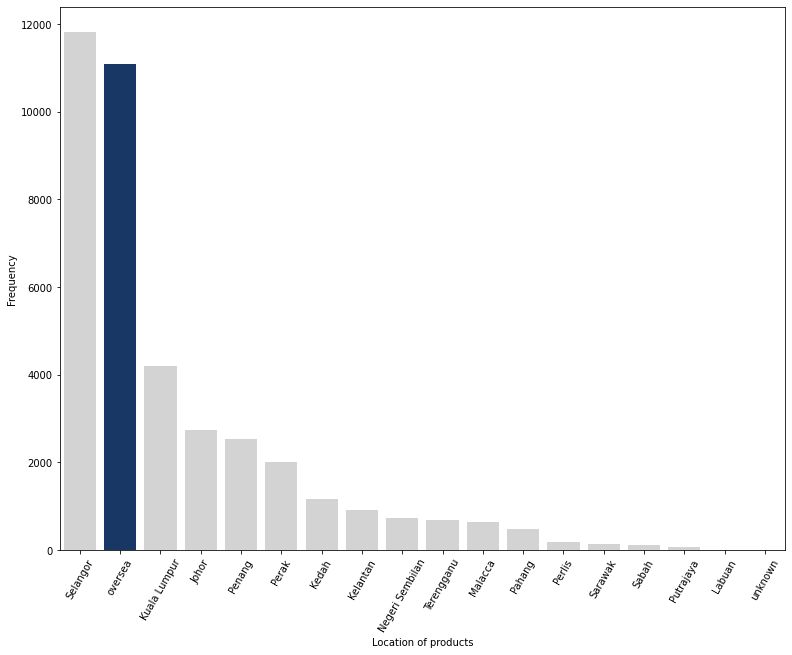

In [66]:
feq_loc = df['seller_location'].value_counts().index
plt.figure(figsize=(13,10))
ax = sns.countplot(x='seller_location',data=df,order=feq_loc,palette='cividis')
for bins in ax.patches:
        if not(0.5 <= bins.get_x() < 1.5):
            bins.set_facecolor('lightgrey')
plt.xticks(rotation=60)
plt.ylabel("Frequency")
plt.xlabel("Location of products")
plt.show()


In [67]:
top_prod_types = df.groupby('product_type',as_index=False)['total_sold'].sum().sort_values(by='total_sold',ascending=False).head(10)
top_prod_types

,product_type,total_sold
186,Stationery,"4,269,322.00"
85,Home Decor,"4,063,438.00"
88,Home Storage & Organization,"3,065,743.00"
178,Snacks,"2,084,374.00"
16,Bedding,"1,794,136.00"
63,Feeding & Nursing,"1,757,715.00"
87,Home Improvement,"1,681,574.00"
42,Cooking Ingredients,"1,545,285.00"
89,Household Supplies,"1,372,502.00"
101,Kitchen & Dining,"1,354,046.00"


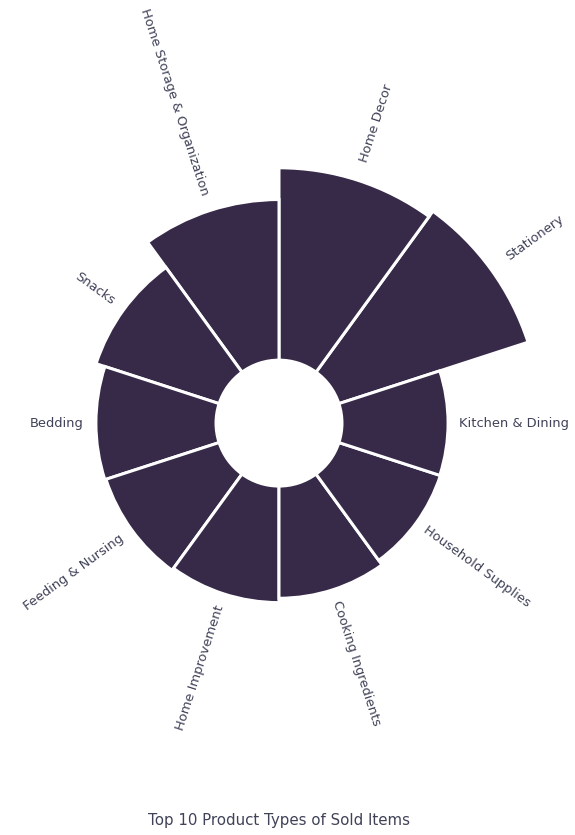

In [68]:
# initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

upperLimit = 100
lowerLimit = top_prod_types['total_sold'].min()-2000

max_val =  top_prod_types['total_sold'].max()
slope = (max_val - lowerLimit) / max_val

heights = slope * top_prod_types.total_sold + lowerLimit
width = 2*np.pi / len(top_prod_types.index)

indexes = list(range(1, len(top_prod_types.index)+1))
angles = [element * width for element in indexes]

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=3, 
    edgecolor="white",
    color="#372948",
)##9D3C72/372948/1F8A70

# little space between the bar and the label
labelPadding = 200

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, top_prod_types["product_type"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    #fontfamily or family: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
    # fontweight or weight: {a numeric value in range 0-1000, 'ultralight', 'light', 'normal', 'regular', 'book', 'medium', 
    #'roman', 'semibold', 'demibold', 'demi', 'bold', 'heavy', 'extra bold', 'black'}
    ax.text(
        color='#404258',
        fontfamily= 'sans-serif',
        fontsize = 13,
        x=angle, 
        y=lowerLimit + bar.get_height()+(bar.get_height()/10) ,
        s=label, 
        ha=alignment,
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

#plt.title('hi',loc='right',y=1.1)
ax.set_title('Top 10 Product Types of Sold Items',fontsize=15,loc='center',y=-0.25,color='#404258')
plt.show()

In [69]:
#which sellers have more total rating with total sold 
tot_rate_sold = (df.groupby(['seller_name','seller_location'],as_index=False)[['total_rating','total_sold']]
    .sum().sort_values(by='total_rating',ascending=False).head(10))

tot_rate_sold

,seller_name,seller_location,total_rating,total_sold
6467,momohouse.os,Kedah,421894,"1,632,512.00"
6925,nestle.os,Selangor,326514,"1,222,026.00"
1656,cadarstation,Selangor,214711,"971,734.00"
3724,gsonho,Selangor,155173,"452,362.00"
2049,cloudbedding,Perak,140841,"449,500.00"
8594,shop_ready_stock,Selangor,138718,"898,480.00"
6029,marchever,Penang,120736,"400,546.00"
8598,shopee_mart,Selangor,108423,"374,913.00"
9110,supermanmotor,Selangor,99949,"271,823.00"
884,atp_pbs,Perak,95927,"867,533.00"


In [70]:
#making sizes for the bubles 
low = round(tot_rate_sold['total_sold'].min()/1000,1)
high = round(tot_rate_sold['total_sold'].max()/1000,1)

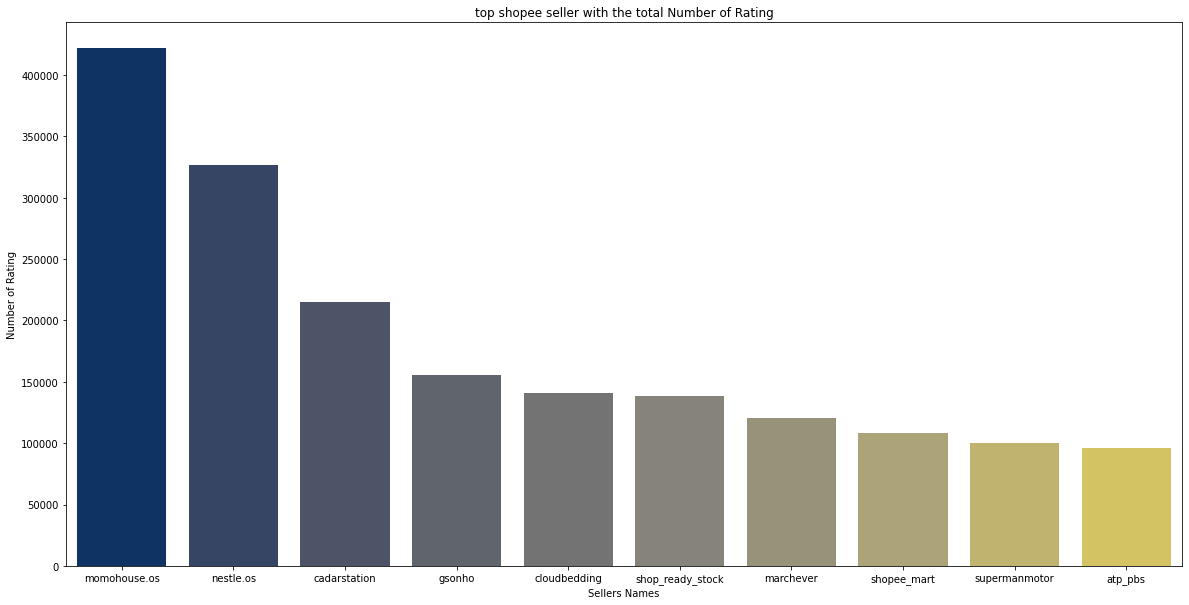

In [71]:
plt.figure(figsize=(20,10))
sns.barplot(x='seller_name',y='total_rating',palette='cividis',
                data=tot_rate_sold,)
plt.xlabel('Sellers Names')
plt.ylabel('Number of Rating')

plt.title('top shopee seller with the total Number of Rating')

#plt.yticks(np.arange(df['total_rating'].min()/1000, df['total_rating'].max()/1000, 50))
plt.show()

### insights
- number of sellers in each state
- revenew for each seller
- revenue in each state

In [72]:
seller_revenue = df.groupby(['seller_name','seller_location'],as_index=False)['revenue'].sum().sort_values(by='revenue',ascending=False)
seller_revenue['seller_location'] = seller_revenue['seller_location'].apply(lambda x: x if x=='oversea' else 'local')
seller_revenue

,seller_name,seller_location,revenue
6925,nestle.os,local,"36,815,766.67"
7441,otakuya,local,"35,592,312.00"
5223,kitchenz,local,"28,640,663.00"
6467,momohouse.os,local,"27,614,189.54"
2049,cloudbedding,local,"21,360,370.00"
...,...,...,...
497,aljanifesyen.my,oversea,0.00
7987,rajatnm,local,0.00
499,alka.olshop.my,oversea,0.00
500,alkaf.store.my,oversea,0.00


In [73]:
prod_revenue = seller_revenue.groupby('seller_location',as_index=False)['revenue'].sum().sort_values(by='revenue',ascending=False)
prod_revenue['rev_precent'] = prod_revenue['revenue'].apply(lambda x: round(float(x)/prod_revenue['revenue'].sum() *100,2) )
prod_revenue 

,seller_location,revenue,rev_precent
0,local,"970,805,952.70",91.14
1,oversea,"94,386,619.44",8.86


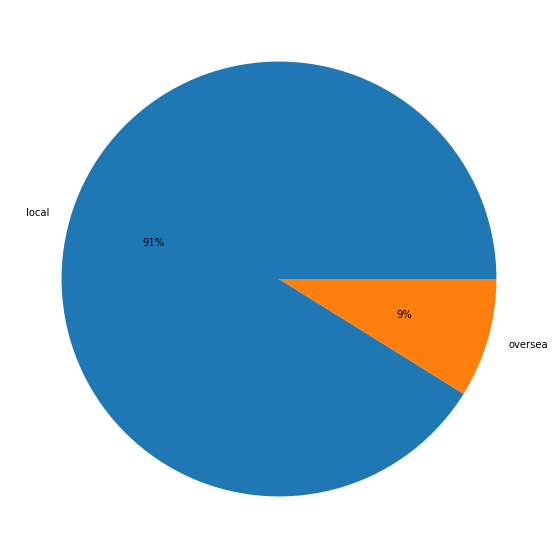

In [74]:
plt.pie(labels=prod_revenue['seller_location'],x=prod_revenue['revenue'],autopct='%.0f%%')
plt.show()

### revenue for each state and overseas 

In [75]:

loc_revenue = df.groupby(['seller_location'],as_index=False)['revenue'].sum().sort_values(by='revenue',ascending=False)
loc_revenue

,seller_location,revenue
14,Selangor,"480,378,922.08"
3,Kuala Lumpur,"122,588,226.29"
8,Penang,"108,032,728.83"
16,oversea,"94,386,619.44"
0,Johor,"72,203,595.86"
9,Perak,"66,268,605.33"
1,Kedah,"44,412,601.70"
6,Negeri Sembilan,"19,524,748.91"
7,Pahang,"14,651,577.63"
5,Malacca,"13,748,713.04"


<AxesSubplot: xlabel='seller_location', ylabel='revenue'>

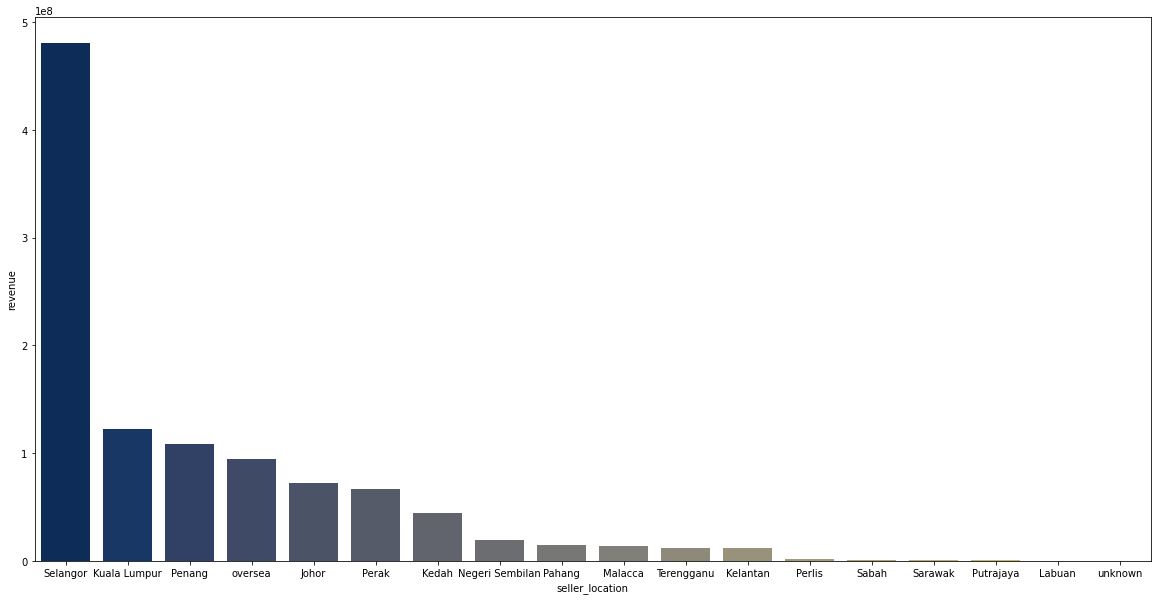

In [76]:
plt.figure(figsize=(20,10))
sns.barplot(data=loc_revenue,x='seller_location',y='revenue',palette='cividis',units='revenue')

### Revenue for each main category

In [77]:
df.groupby(['main_category'],as_index=False)['revenue'].sum().sort_values(by='revenue',ascending=False)

,main_category,revenue
9,Home & Living,"343,866,998.26"
1,Baby & Toys,"168,737,001.11"
7,Groceries & Pets,"146,998,778.52"
14,Mobile & Gadgets,"63,678,242.61"
0,Automotive,"62,966,911.85"
3,Computer & Accessories,"45,601,513.30"
6,Gaming & Consoles,"41,932,931.36"
10,Home Appliances,"28,926,323.32"
2,Cameras & Drones,"24,935,082.39"
20,Watches,"24,411,172.83"


### price distribution for each main category 

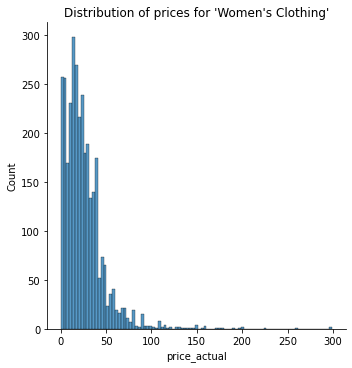

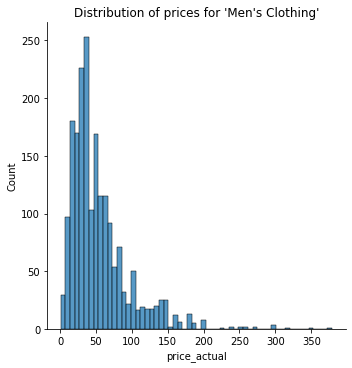

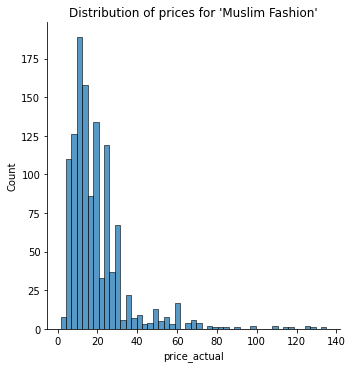

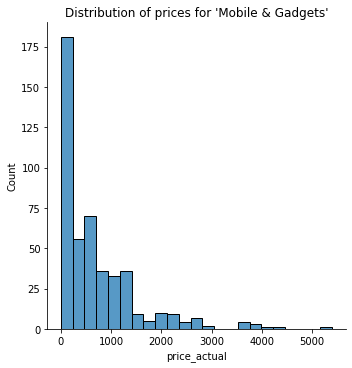

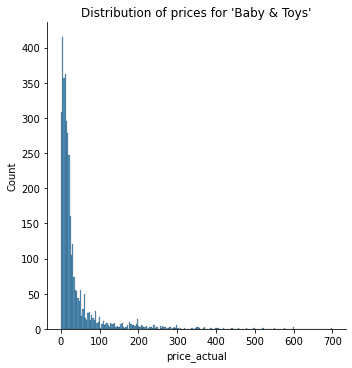

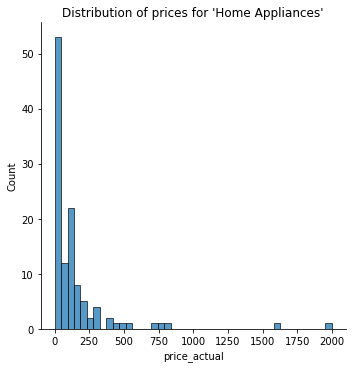

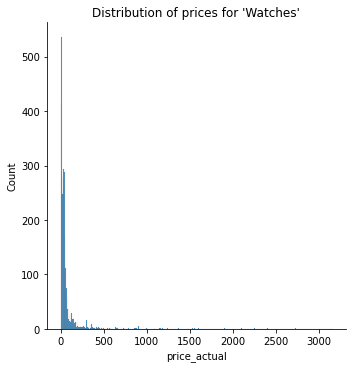

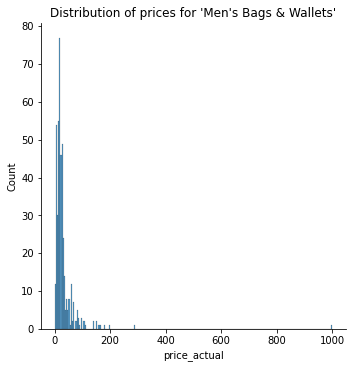

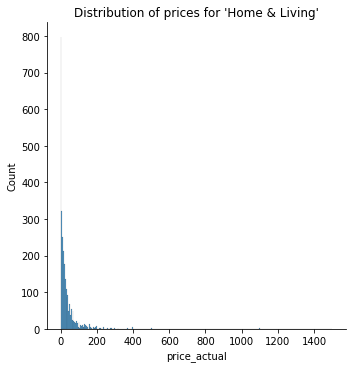

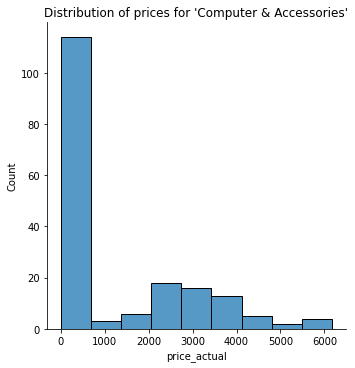

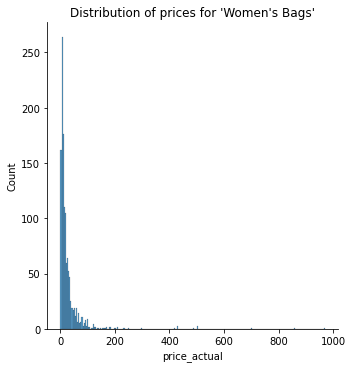

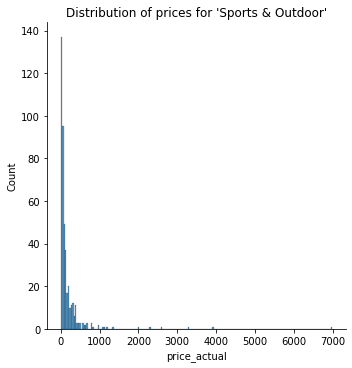

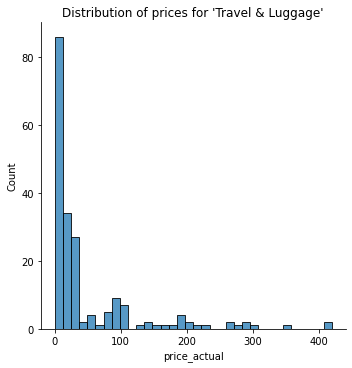

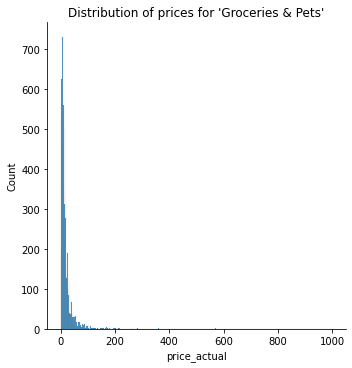

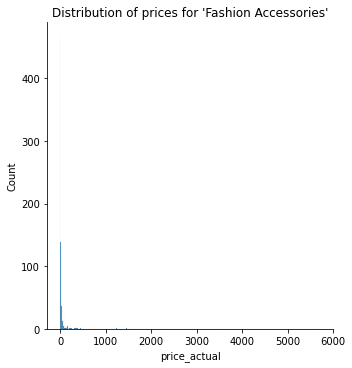

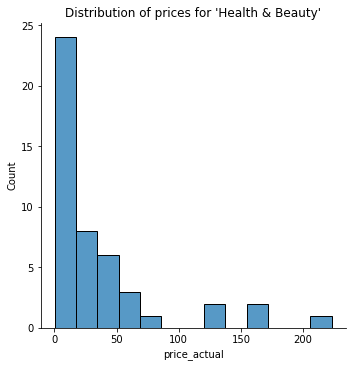

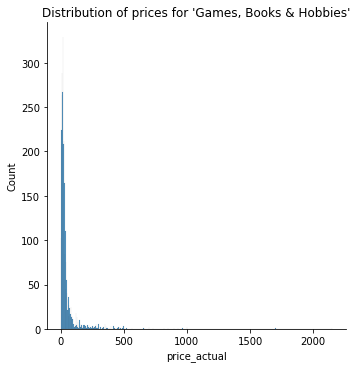

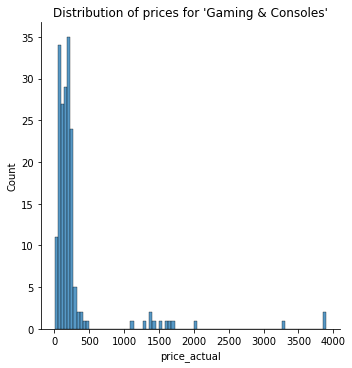

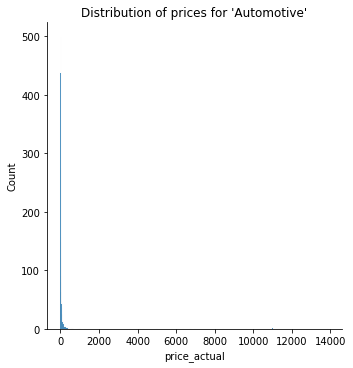

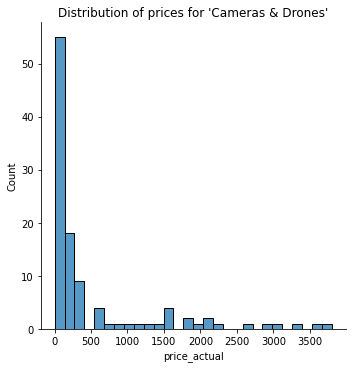

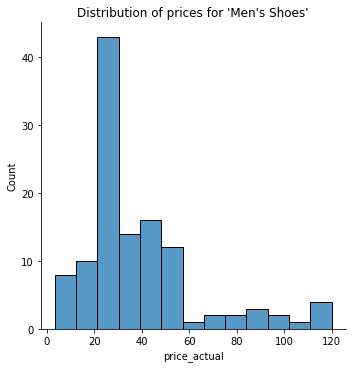

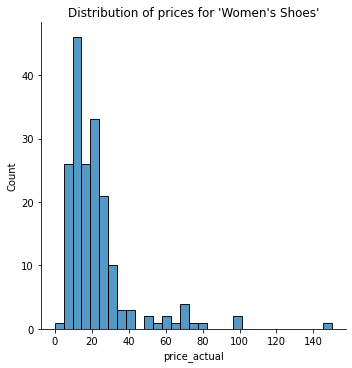

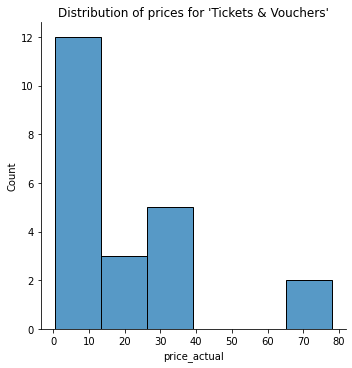

In [78]:
df_sold = df[ df['total_sold'] > 0]
for i in df_sold['main_category'].unique():
    df_dist = df_sold[(df_sold['main_category'] == i)]
    
    sns.displot(data=df_dist, x='price_actual')
    plt.title(f"Distribution of prices for '{i}'")
    plt.show()
    

In [79]:
df.sold_item.nunique()

828

In [80]:
df

,original_price,crawling_date,item_rating,seller_name,price_actual,total_rating,total_sold,main_category,product_type,sold_item,mean_shipping_fee,seller_location,seller_duration,revenue
1,57.78,2020-11-23,0.00,showcasemywardore,57.78,1,0.00,Women's Clothing,Dresses,Midi Dresses,5.00,Kuala Lumpur,< 1 year,0.00
2,82.00,2020-11-23,5.00,zanzea.os,39.36,3,3.00,Women's Clothing,Dresses,Maxi Dresses,0.00,oversea,3 - 5 years,118.08
3,115.00,2020-11-23,0.00,airspacemy.os,115.00,0,0.00,Women's Clothing,Dresses,Maxi Dresses,0.00,Selangor,< 1 year,0.00
4,40.90,2020-11-23,4.80,zanzea.os,40.90,123,242.00,Women's Clothing,Dresses,Maxi Dresses,0.00,oversea,3 - 5 years,"9,897.80"
5,37.00,2020-11-23,3.00,ikon.my,27.75,1,4.00,Women's Clothing,Dresses,Mini Dresses,0.00,oversea,1 - 3 years,111.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42420,105.00,2020-12-02,0.00,padmavathi,105.00,2,0.00,Women's Clothing,Traditional Wear,Saree & Anarkali,0.31,Johor,3 - 5 years,0.00
42421,80.00,2020-12-02,5.00,msalimjb,80.00,1,1.00,Women's Clothing,Traditional Wear,Traditional Wear,0.31,Johor,< 1 year,80.00
42422,20.70,2020-12-02,4.80,phandes,20.70,1000,"1,600.00",Mobile & Gadgets,Cases & Covers,iPhone Hard Cover,0.82,Kuala Lumpur,> 5 years,"33,120.00"
42423,30.00,2020-12-02,5.00,housewifepartner.my,30.00,410,774.00,Mobile & Gadgets,Cases & Covers,iPhone Soft Cover,0.00,oversea,< 1 year,"23,220.00"


### number of seller vs population for each state

In [81]:
#head(15) to exclude 'oversea' and 'unknown' values
num_state_sellers =df.groupby('seller_location',as_index=False,)['seller_name'].count().sort_values(by='seller_location').head(16)
num_state_sellers

,seller_location,seller_name
0,Johor,2748
1,Kedah,1167
2,Kelantan,922
3,Kuala Lumpur,4191
4,Labuan,9
5,Malacca,635
6,Negeri Sembilan,737
7,Pahang,492
8,Penang,2524
9,Perak,2010


In [82]:
pop_states=df_pop[['State','Population']].sort_values(by='State' ,ascending=True)
pop_states.reset_index(drop=True,inplace=True)

In [83]:
df_seller_n_pop = pd.concat([pop_states,num_state_sellers],axis=1)
df_seller_n_pop.drop(columns='State',inplace=True)
df_seller_n_pop.rename(columns={'seller_name':'number_of_sellers'},inplace=True)

#create percentage for population and sellers
df_seller_n_pop['percent_of_sellers'] = df_seller_n_pop['number_of_sellers'].apply(lambda x:
                                             round(x*100/(df_seller_n_pop['number_of_sellers'].sum()),2) )
df_seller_n_pop['percent_of_pop'] = df_seller_n_pop['Population'].apply(lambda x:
                                             round(x*100/(df_seller_n_pop['Population'].sum()),2) )


#drop columns of  real numbers 
df_seller_n_pop.drop(columns=['number_of_sellers','Population'],inplace=True)

df_seller_n_pop

,seller_location,percent_of_sellers,percent_of_pop
0,Johor,9.67,12.10
1,Kedah,4.11,6.83
2,Kelantan,3.24,5.27
3,Kuala Lumpur,14.75,5.88
4,Labuan,0.03,0.31
5,Malacca,2.23,2.85
6,Negeri Sembilan,2.59,3.60
7,Pahang,1.73,5.21
8,Penang,8.88,5.49
9,Perak,7.07,8.16


In [84]:
df_seller_n_pop

,seller_location,percent_of_sellers,percent_of_pop
0,Johor,9.67,12.10
1,Kedah,4.11,6.83
2,Kelantan,3.24,5.27
3,Kuala Lumpur,14.75,5.88
4,Labuan,0.03,0.31
5,Malacca,2.23,2.85
6,Negeri Sembilan,2.59,3.60
7,Pahang,1.73,5.21
8,Penang,8.88,5.49
9,Perak,7.07,8.16


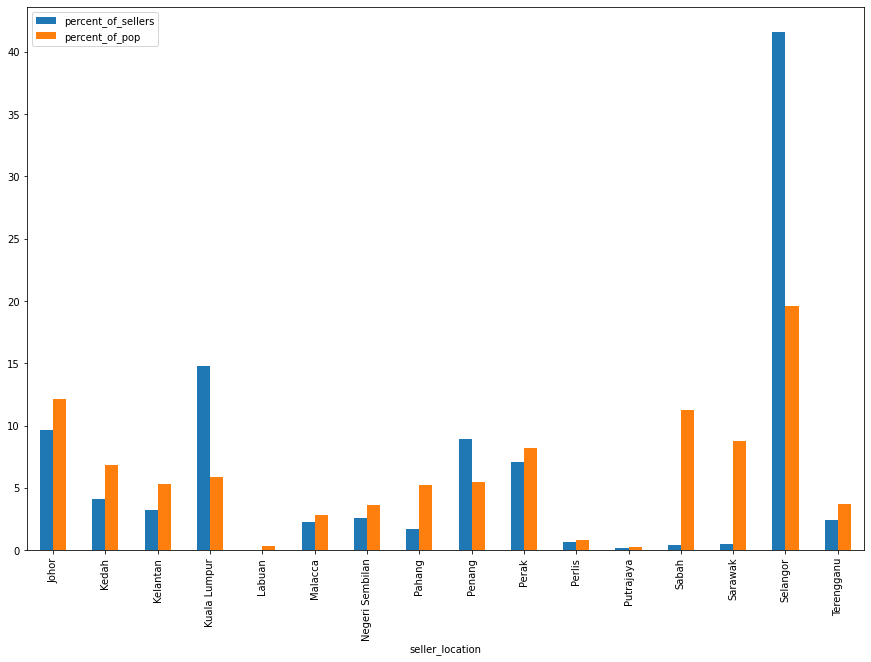

In [85]:
axs= df_seller_n_pop.set_index('seller_location').plot.bar()

In [106]:
df.groupby(["sold_item"],as_index=False)['revenue'].sum().sort_values(by='revenue', ascending=False).head(10)

,sold_item,revenue
77,Bedding Sets & Sheets,"52,256,167.02"
717,Storage Cabinets,"46,605,246.18"
754,Toddler Milk (1-3 years),"37,185,380.13"
517,Nintendo,"30,686,138.86"
78,Bedroom Furniture,"26,982,750.29"
181,Chocolate & Malt,"26,548,198.32"
639,Rugs & Carpets,"21,774,824.97"
438,Living Room Furniture,"21,519,272.30"
201,Cookware,"20,509,072.38"
487,Mixers & Blenders,"17,013,955.18"


### trying to make ckustering by using Hierarchical

In [395]:
df_cp = df.copy()
df_cp

,original_price,crawling_date,item_rating,seller_name,price_actual,total_rating,total_sold,main_category,product_type,sold_item,mean_shipping_fee,seller_location,seller_duration,revenue
1,57.78,2020-11-23,0.00,showcasemywardore,57.78,1,0.00,Women's Clothing,Dresses,Midi Dresses,5.00,Kuala Lumpur,< 1 year,0.00
2,82.00,2020-11-23,5.00,zanzea.os,39.36,3,3.00,Women's Clothing,Dresses,Maxi Dresses,0.00,oversea,3 - 5 years,118.08
3,115.00,2020-11-23,0.00,airspacemy.os,115.00,0,0.00,Women's Clothing,Dresses,Maxi Dresses,0.00,Selangor,< 1 year,0.00
4,40.90,2020-11-23,4.80,zanzea.os,40.90,123,242.00,Women's Clothing,Dresses,Maxi Dresses,0.00,oversea,3 - 5 years,"9,897.80"
5,37.00,2020-11-23,3.00,ikon.my,27.75,1,4.00,Women's Clothing,Dresses,Mini Dresses,0.00,oversea,1 - 3 years,111.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42420,105.00,2020-12-02,0.00,padmavathi,105.00,2,0.00,Women's Clothing,Traditional Wear,Saree & Anarkali,0.31,Johor,3 - 5 years,0.00
42421,80.00,2020-12-02,5.00,msalimjb,80.00,1,1.00,Women's Clothing,Traditional Wear,Traditional Wear,0.31,Johor,< 1 year,80.00
42422,20.70,2020-12-02,4.80,phandes,20.70,1000,"1,600.00",Mobile & Gadgets,Cases & Covers,iPhone Hard Cover,0.82,Kuala Lumpur,> 5 years,"33,120.00"
42423,30.00,2020-12-02,5.00,housewifepartner.my,30.00,410,774.00,Mobile & Gadgets,Cases & Covers,iPhone Soft Cover,0.00,oversea,< 1 year,"23,220.00"


### some required adjusting for the dataframe

- drop 'crawling_date' -> no need for it
- check any outliers and then handle them.
- relabeling any categorical column to be numerical
- standrizing all columns(scaling)

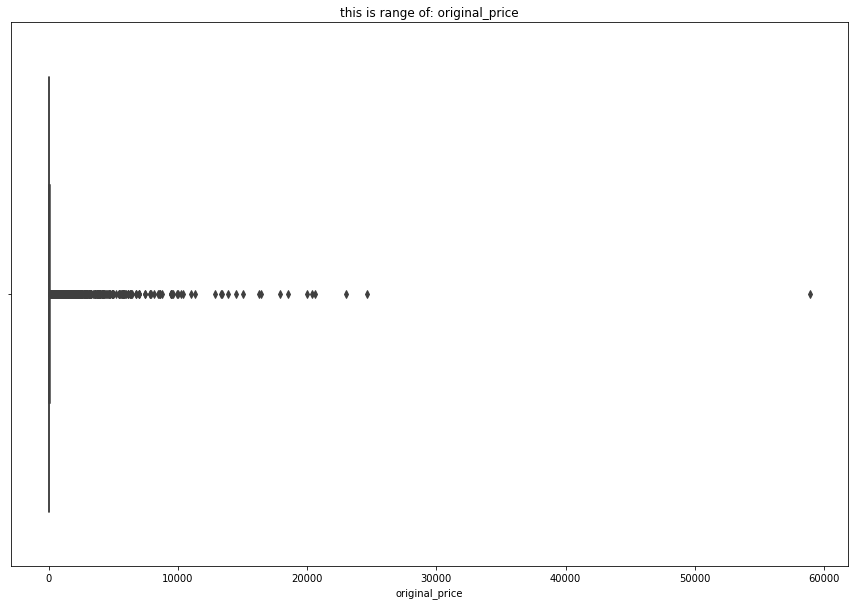

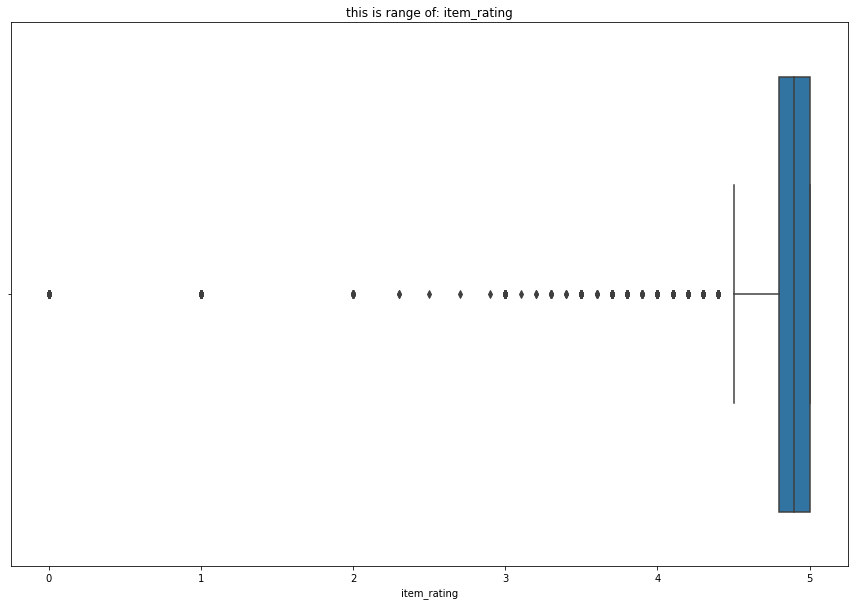

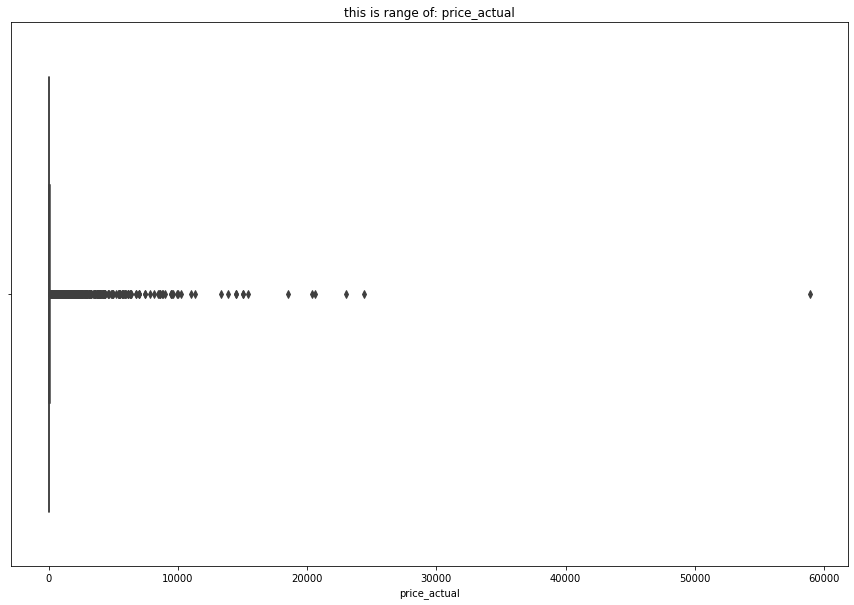

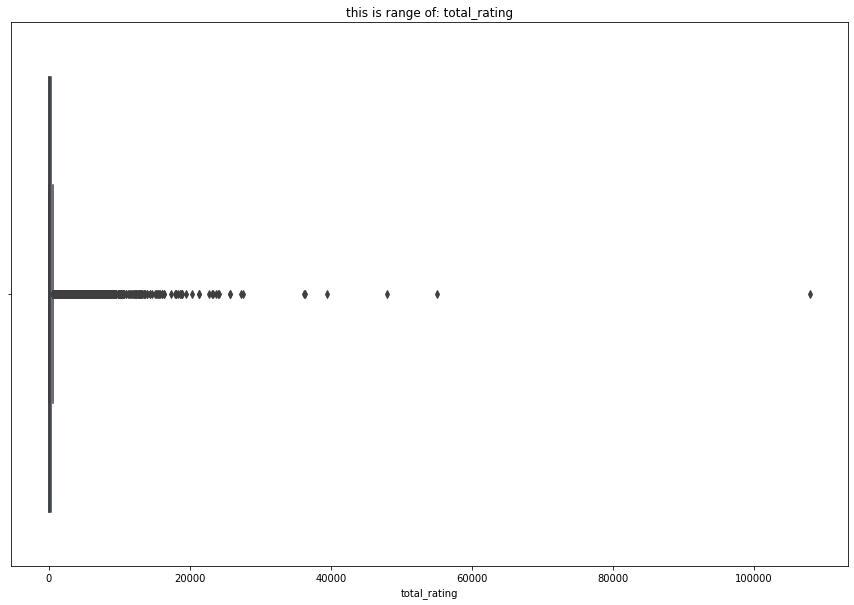

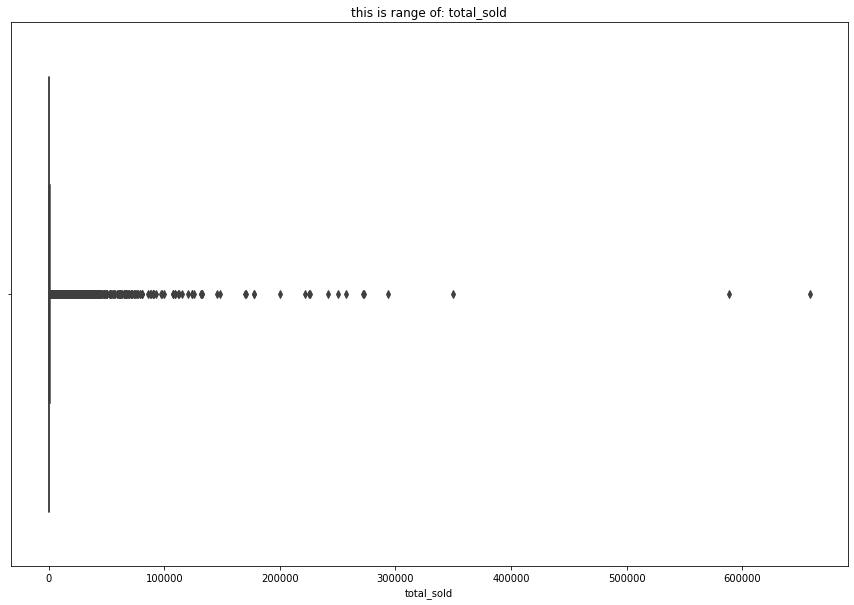

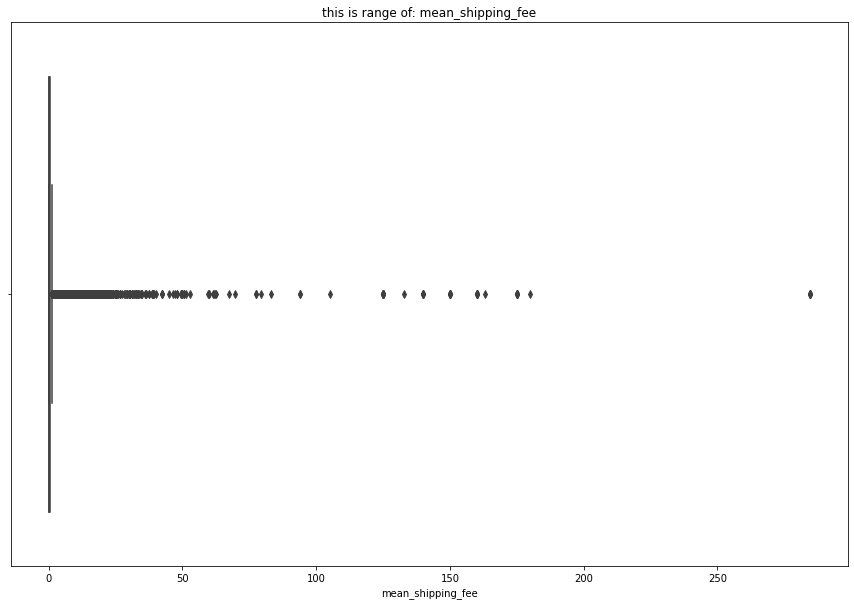

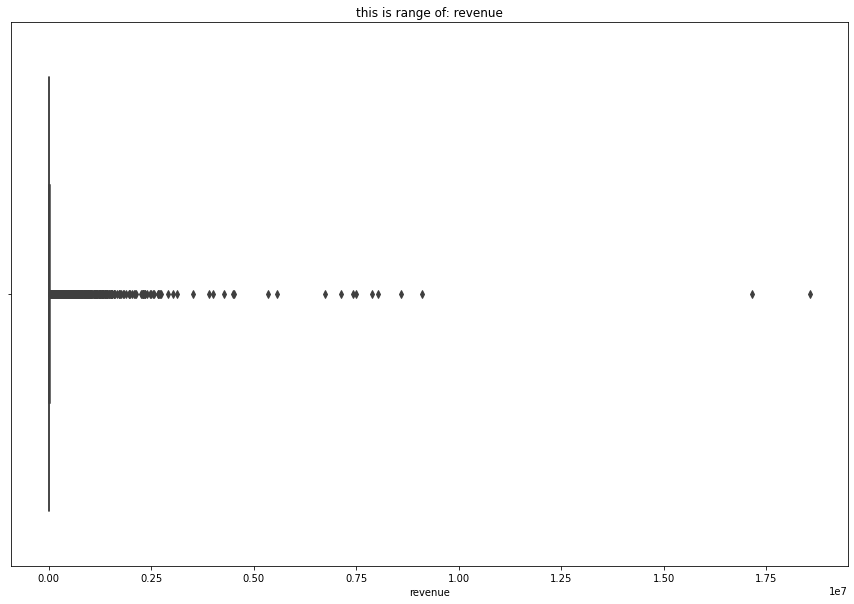

In [396]:
for i in df_cp.select_dtypes(include=np.number).columns:
    sns.boxplot(data=df_cp, x=i)
    plt.title(f"this is range of: {i}")
    plt.show()

## need to be standarized

In [412]:
df_cp['original_price'].fillna(0,inplace=True)

In [413]:
# first will change categorical columns to numerical 
le = LabelEncoder()
for i in df_cp.select_dtypes(include='object').columns:
    df_cp[i] = le.fit_transform(df_cp[i])

df_cp

,original_price,item_rating,price_actual,total_rating,total_sold,main_category,product_type,sold_item,mean_shipping_fee,seller_location,seller_duration,revenue
1,57.78,0.00,57.78,1,0.00,22,52,477,5.00,3,2,0.00
2,82.00,5.00,39.36,3,3.00,22,52,464,0.00,16,1,118.08
3,115.00,0.00,115.00,0,0.00,22,52,464,0.00,14,2,0.00
4,40.90,4.80,40.90,123,242.00,22,52,464,0.00,16,1,"9,897.80"
5,37.00,3.00,27.75,1,4.00,22,52,481,0.00,16,0,111.00
...,...,...,...,...,...,...,...,...,...,...,...,...
42420,105.00,0.00,105.00,2,0.00,22,199,649,0.31,0,1,0.00
42421,80.00,5.00,80.00,1,1.00,22,199,769,0.31,0,2,80.00
42422,20.70,4.80,20.70,494,"1,600.00",14,33,825,0.82,3,3,"22,250.00"
42423,30.00,5.00,30.00,410,774.00,14,33,826,0.00,16,2,"22,250.00"


In [414]:
#droping the undesired columns
df_cp.drop(columns=['crawling_date','seller_name'],inplace=True)

KeyError: "['crawling_date', 'seller_name'] not found in axis"

In [415]:
## using quantile to set maximum values for 'revenue' and 'total_rating' equal to 0.85 
rev_max = df_cp['revenue'].quantile(0.85)
rat_max = df_cp['total_rating'].quantile(0.85)

df_cp.loc[df_cp['revenue'] > rev_max, 'revenue'] =rev_max
df_cp.loc[df_cp['total_rating'] > rat_max, 'total_rating'] =rat_max

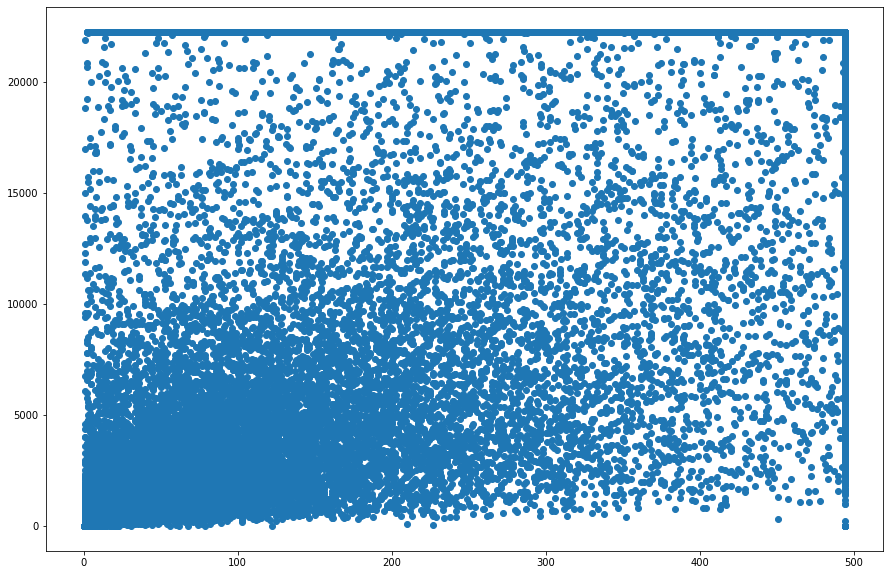

In [416]:
plt.scatter(df_cp['total_rating'], df_cp['revenue'])

In [419]:
## scaling the whole dataframe
scaler = StandardScaler()

df_stnd = scaler.fit_transform(df_cp)

df_stnd

array([[-0.05749228, -3.41836444, -0.03304967, ..., -1.36483304,
         0.4340893 , -0.77777331],
       [-0.01592292,  0.38337322, -0.06649763, ...,  0.93316057,
        -0.23665563, -0.76309679],
       [ 0.04071577, -3.41836444,  0.07085327, ...,  0.57962309,
         0.4340893 , -0.77777331],
       ...,
       [-0.12113356,  0.23130372, -0.10038139, ..., -1.36483304,
         1.10483423,  1.98774626],
       [-0.10517175,  0.38337322, -0.08349398, ...,  0.93316057,
         0.4340893 ,  1.98774626],
       [-0.13091661,  0.38337322, -0.13208613, ...,  0.93316057,
         1.77557916, -0.13343833]])

### start making clustering (k-means) 

In [424]:
#first trying to specify k
wcss = [] #within clusters sum of square

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++', random_state=20,) 
    # 'k-means++' runs before the kmeans to find best centroid position
    kmeans.fit(df_stnd)
    wcss.append(kmeans.inertia_)

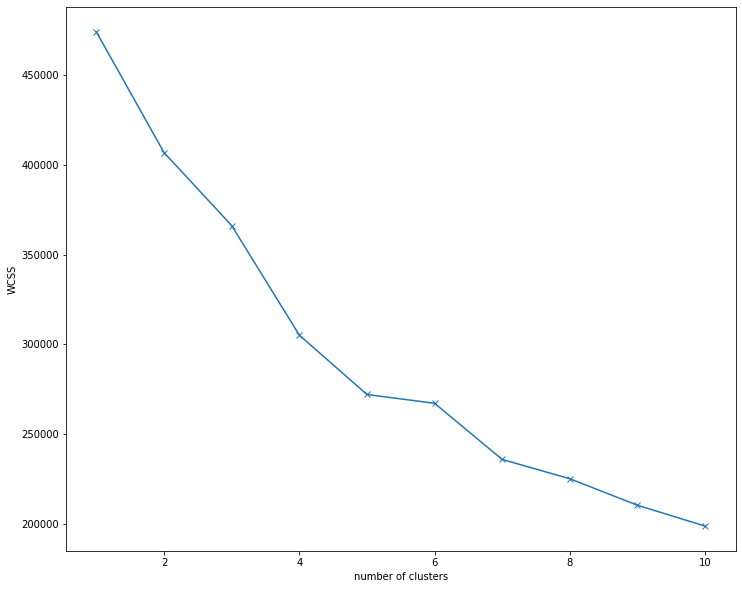

In [425]:
plt.figure(figsize=(12,10))
plt.plot(range(1,11), wcss, marker='x',)
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

### from the previous result we will use k = 5

In [426]:
kmeans = KMeans(n_clusters=5,init='k-means++', random_state=20,) 
kmeans.fit(df_stnd)

KMeans(n_clusters=5, random_state=20)

In [428]:
df_segm = df_cp.copy()
df_segm['segment_kmeans'] = kmeans.labels_

In [429]:
df_segm.groupby(['segment_kmeans']).mean()

,original_price,item_rating,price_actual,total_rating,total_sold,main_category,product_type,sold_item,mean_shipping_fee,seller_location,seller_duration,revenue
segment_kmeans,,,,,,,,,,,,
0,73.62,4.84,52.78,45.56,143.03,17.03,154.73,522.86,0.47,11.94,1.37,"2,062.23"
1,38.11,4.90,31.94,90.98,288.60,5.29,69.20,305.82,0.54,10.03,1.18,"2,989.49"
2,109.63,4.88,94.93,416.79,"4,744.81",7.26,90.34,392.45,0.91,9.64,1.61,"18,645.88"
3,162.28,0.03,131.46,0.65,0.07,14.37,134.79,454.43,1.14,12.47,1.29,6.17
4,"10,577.81",1.02,"10,174.81",1.04,1.84,0.89,122.32,499.56,132.66,9.77,1.56,"3,696.75"


In [430]:
df_segm

,original_price,item_rating,price_actual,total_rating,total_sold,main_category,product_type,sold_item,mean_shipping_fee,seller_location,seller_duration,revenue,segment_kmeans
1,57.78,0.00,57.78,1,0.00,22,52,477,5.00,3,2,0.00,3
2,82.00,5.00,39.36,3,3.00,22,52,464,0.00,16,1,118.08,0
3,115.00,0.00,115.00,0,0.00,22,52,464,0.00,14,2,0.00,3
4,40.90,4.80,40.90,123,242.00,22,52,464,0.00,16,1,"9,897.80",0
5,37.00,3.00,27.75,1,4.00,22,52,481,0.00,16,0,111.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42420,105.00,0.00,105.00,2,0.00,22,199,649,0.31,0,1,0.00,3
42421,80.00,5.00,80.00,1,1.00,22,199,769,0.31,0,2,80.00,0
42422,20.70,4.80,20.70,494,"1,600.00",14,33,825,0.82,3,3,"22,250.00",2
42423,30.00,5.00,30.00,410,774.00,14,33,826,0.00,16,2,"22,250.00",2


In [441]:
#porpprtion 
tot_num_segm = df_segm.groupby(['segment_kmeans'])['segment_kmeans'].count()
tot_num_segm / df_segm['segment_kmeans'].count() * 100


segment_kmeans
0   31.33
1   36.65
2   24.19
3    7.68
4    0.14
Name: segment_kmeans, dtype: float64

<AxesSubplot: xlabel='total_rating', ylabel='revenue'>

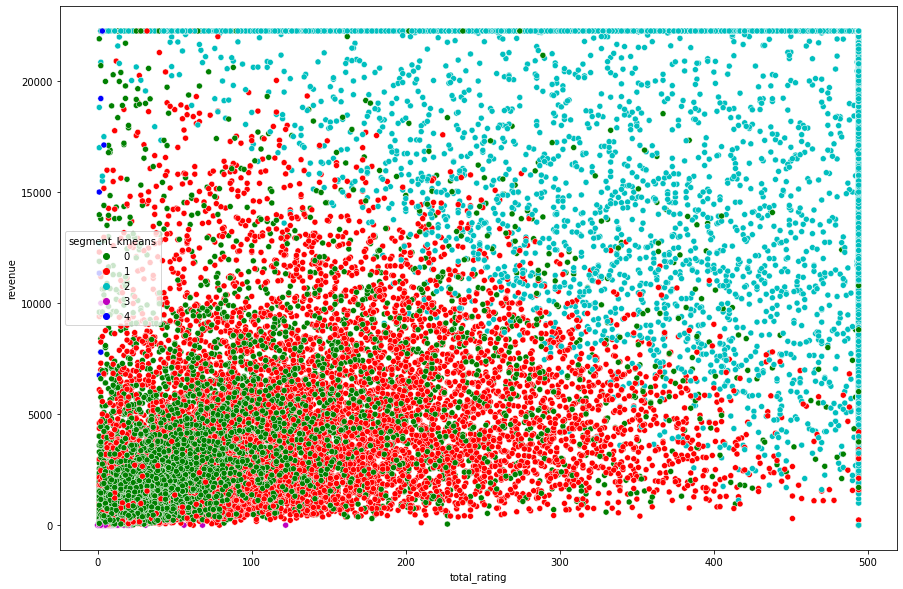

In [435]:
sns.scatterplot(x='total_rating', y= 'revenue', hue='segment_kmeans' , data =df_segm,palette =['g','r','c','m','b'])

## PCA (principle component analysis) 

In [443]:
pca = PCA()

pca.fit(df_stnd)

PCA()

In [444]:
pca.explained_variance_ratio_

array([0.20550119, 0.19537057, 0.11998292, 0.08619194, 0.07996961,
       0.07450187, 0.06630809, 0.06163959, 0.05110453, 0.04120085,
       0.01579577, 0.00243307])

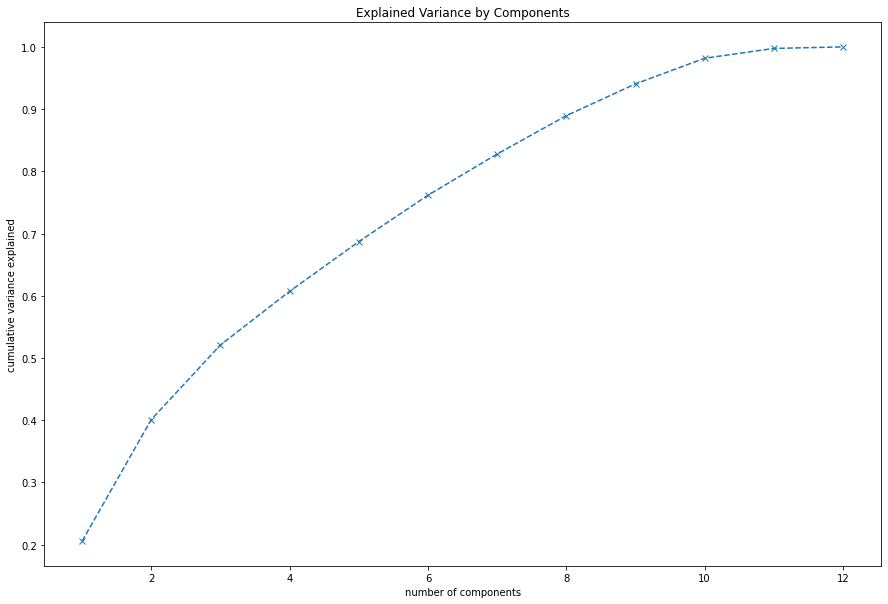

In [446]:
plt.figure(figsize=(15,10))
plt.plot(range(1,13), pca.explained_variance_ratio_.cumsum(), marker='x', linestyle='--')
plt.xlabel('number of components')
plt.ylabel('cumulative variance explained')
plt.title('Explained Variance by Components')
plt.show()

## Rule of Thumb is to keep 80% of the variance 

In [447]:
pca_ = PCA(n_components = 7)
pca_.fit(df_stnd)

PCA(n_components=7)

In [448]:
pca.components_

array([[ 3.70788821e-01, -2.88381106e-01,  3.67395470e-01,
        -4.34110897e-01, -1.77711713e-01,  2.91376115e-01,
         2.73367200e-01,  1.76496782e-01,  2.71556426e-01,
         1.12715798e-01, -5.29548558e-02, -3.79876416e-01],
       [ 4.93149416e-01,  7.31571863e-02,  4.96964628e-01,
         2.90708923e-01,  1.22594970e-01, -2.74509151e-01,
        -2.17772557e-01, -9.45356562e-02,  3.79962756e-01,
        -1.08835199e-01,  3.20385939e-02,  3.40552807e-01],
       [ 1.57251527e-02,  4.31766340e-03,  9.65597175e-03,
         3.20651562e-01,  3.31843220e-01,  4.08715449e-01,
         4.84023199e-01,  4.78251185e-01, -1.85978469e-02,
        -6.00742139e-03,  2.00425151e-01,  3.40734959e-01],
       [-2.64244811e-03, -2.89634638e-01, -7.54822465e-03,
         4.13550435e-02,  1.49577064e-01,  7.10119256e-02,
        -1.30276175e-01, -3.10416346e-01,  4.15508890e-03,
         6.67419004e-01,  5.72009083e-01,  3.05223467e-02],
       [-8.86796181e-03, -1.78401200e-01, -6.7184138

In [457]:
pca_df = pd.DataFrame(data=pca_.components_,
                       columns= df_cp.columns,
                         index= ['Com 1', 'Com 2', 'Com 3','Com 4', 'Com 5', 'Com 6', 'Com 7'])
pca_df

,original_price,item_rating,price_actual,total_rating,total_sold,main_category,product_type,sold_item,mean_shipping_fee,seller_location,seller_duration,revenue
Com 1,0.37,-0.29,0.37,-0.43,-0.18,0.29,0.27,0.18,0.27,0.11,-0.05,-0.38
Com 2,0.49,0.07,0.50,0.29,0.12,-0.27,-0.22,-0.09,0.38,-0.11,0.03,0.34
Com 3,0.02,0.00,0.01,0.32,0.33,0.41,0.48,0.48,-0.02,-0.01,0.20,0.34
Com 4,-0.00,-0.29,-0.01,0.04,0.15,0.07,-0.13,-0.31,0.00,0.67,0.57,0.03
Com 5,-0.01,-0.18,-0.01,0.08,0.35,-0.02,-0.00,-0.02,-0.01,0.49,-0.77,0.09
Com 6,-0.06,-0.58,-0.06,-0.10,0.58,-0.07,-0.04,-0.16,0.03,-0.50,0.06,-0.14
Com 7,0.08,0.67,0.08,-0.28,0.58,0.08,0.03,-0.15,-0.01,0.05,0.08,-0.29


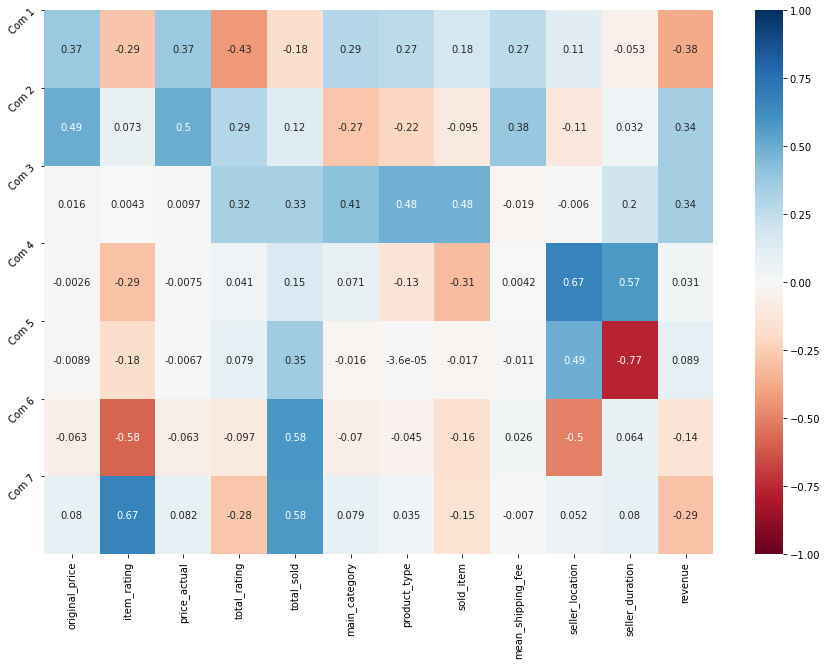

In [463]:
sns.heatmap(pca_df, vmin=-1, vmax=1, annot=True, cmap='RdBu')
plt.yticks([0,1,2,3,4,5,6],['Com 1', 'Com 2', 'Com 3','Com 4', 'Com 5', 'Com 6', 'Com 7'], rotation=45) 
plt.show()

In [466]:
scores_pca= pca_.transform(df_stnd)
scores_pca

array([[ 1.9155823 , -0.69957525, -0.12658678, ..., -0.61695452,
         2.69344435, -1.92768838],
       [ 0.88990847, -0.96537857, -0.26112209, ...,  0.35255069,
        -0.72201865,  0.69754655],
       [ 1.99521695, -1.09722691, -0.14922073, ...,  0.33831812,
         1.69771271, -1.79465087],
       ...,
       [-1.81283404,  1.27273032,  2.01671349, ..., -1.25074863,
        -0.07048761, -1.20135079],
       [-1.36292625,  0.83274173,  1.69076807, ...,  0.28692238,
        -1.37037038, -0.95989169],
       [-0.8758834 ,  0.26439822,  1.41909423, ..., -0.86039857,
        -0.96887484, -0.30847833]])

### K-Means with PCA 

In [467]:
#first trying to specify k
wcss = [] #within clusters sum of square

for i in range(1,11):
    kmeans_pca = KMeans(n_clusters=i,init='k-means++', random_state=20,) 
    # 'k-means++' runs before the kmeans to find best centroid position
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

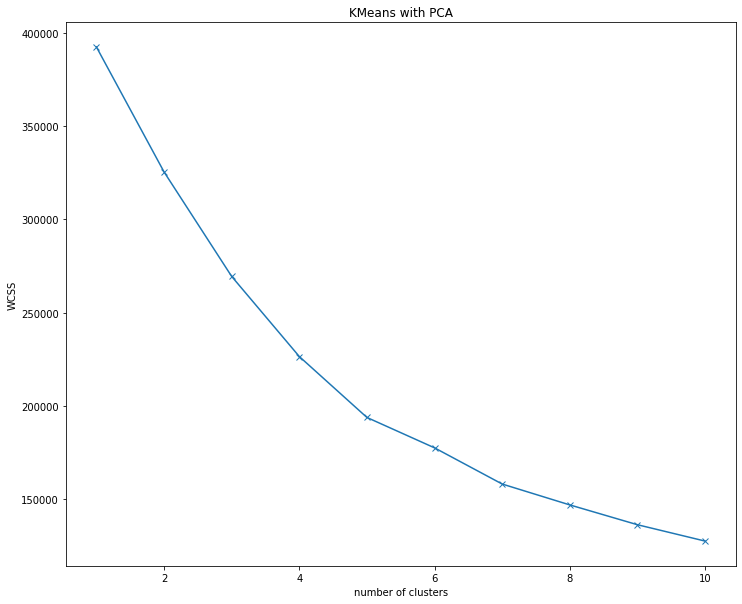

In [468]:
plt.figure(figsize=(12,10))
plt.plot(range(1,11), wcss, marker='x',)
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.title('KMeans with PCA')
plt.show()

In [470]:
#we will stuck with 5 
Kmeans_pca = KMeans(n_clusters=5, init='k-means++', random_state=20)

In [471]:
Kmeans_pca.fit(scores_pca)

KMeans(n_clusters=5, random_state=20)

In [477]:
df_pca_clust = pd.concat([ df_cp.reset_index(drop=True), pd.DataFrame(scores_pca) ],axis=1)
df_pca_clust.columns.values[-7:] = ['Com 1', 'Com 2', 'Com 3','Com 4', 'Com 5', 'Com 6', 'Com 7']
df_pca_clust['Kmeans_pca_labels'] =kmeans.labels_
df_pca_clust

,original_price,item_rating,price_actual,total_rating,total_sold,main_category,product_type,sold_item,mean_shipping_fee,seller_location,seller_duration,revenue,Com 1,Com 2,Com 3,Com 4,Com 5,Com 6,Com 7
0,57.78,0.00,57.78,1,0.00,22,52,477,5.00,3,2,0.00,1.92,-0.70,-0.13,0.39,-0.62,2.69,-1.93
1,82.00,5.00,39.36,3,3.00,22,52,464,0.00,16,1,118.08,0.89,-0.97,-0.26,0.45,0.35,-0.72,0.70
2,115.00,0.00,115.00,0,0.00,22,52,464,0.00,14,2,0.00,2.00,-1.10,-0.15,1.70,0.34,1.70,-1.79
3,40.90,4.80,40.90,123,242.00,22,52,464,0.00,16,1,"9,897.80",0.15,-0.40,0.37,0.56,0.55,-0.85,0.07
4,37.00,3.00,27.75,1,4.00,22,52,481,0.00,16,0,111.00,1.35,-1.16,-0.37,0.48,1.14,0.12,-0.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39516,105.00,0.00,105.00,2,0.00,22,199,649,0.31,0,1,0.00,2.52,-1.43,1.24,-0.88,-0.37,2.67,-2.02
39517,80.00,5.00,80.00,1,1.00,22,199,769,0.31,0,2,80.00,1.45,-1.22,1.63,-1.76,-1.57,0.43,0.50
39518,20.70,4.80,20.70,494,"1,600.00",14,33,825,0.82,3,3,"22,250.00",-1.81,1.27,2.02,-0.55,-1.25,-0.07,-1.20
39519,30.00,5.00,30.00,410,774.00,14,33,826,0.00,16,2,"22,250.00",-1.36,0.83,1.69,0.52,0.29,-1.37,-0.96


In [479]:

df_pca_clust.groupby('Kmeans_pca_labels').mean()

,original_price,item_rating,price_actual,total_rating,total_sold,main_category,product_type,sold_item,mean_shipping_fee,seller_location,seller_duration,revenue,Com 1,Com 2,Com 3,Com 4,Com 5,Com 6,Com 7
Kmeans_pca_labels,,,,,,,,,,,,,,,,,,,
0,73.62,4.84,52.78,45.56,143.03,17.03,154.73,522.86,0.47,11.94,1.37,"2,062.23",0.95,-0.90,0.59,-0.17,-0.11,-0.39,0.44
1,38.11,4.90,31.94,90.98,288.60,5.29,69.20,305.82,0.54,10.03,1.18,"2,989.49",-0.29,0.03,-1.06,-0.12,-0.11,0.04,0.30
2,109.63,4.88,94.93,416.79,"4,744.81",7.26,90.34,392.45,0.91,9.64,1.61,"18,645.88",-1.59,1.26,0.87,0.08,0.13,-0.13,-0.44
3,162.28,0.03,131.46,0.65,0.07,14.37,134.79,454.43,1.14,12.47,1.29,6.17,2.12,-0.96,-0.05,1.01,0.58,1.81,-1.86
4,"10,577.81",1.02,"10,174.81",1.04,1.84,0.89,122.32,499.56,132.66,9.77,1.56,"3,696.75",19.88,25.34,-0.53,0.32,-0.35,-0.11,1.12


<AxesSubplot: xlabel='Com 1', ylabel='Com 2'>

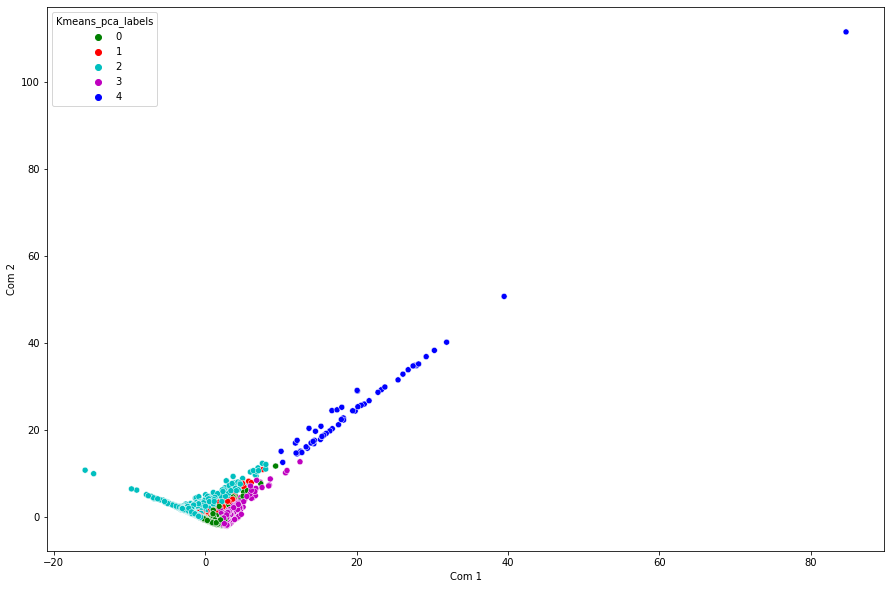

In [480]:
## plotting using first 2 components 

sns.scatterplot(data=df_pca_clust, x='Com 1', y='Com 2', hue= 'Kmeans_pca_labels', palette=['g','r','c','m','b'])